In [1]:
# !pip install xgboost
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, chi2, SequentialFeatureSelector, SelectFromModel
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, roc_auc_score, roc_curve,
                             RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, f1_score)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
import shap
import catboost as cb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")


In [3]:
cols = ["x_smoker3", "x_llcpwt", "stopsmk2", "smokday2", "smoke100", "lastsmk2", "x_bmi5", "x_bmi5cat", "menthlth", "physhlth",
         "poorhlth", "genhlth", "cadult", "numadult", "hhadult", "x_age_g", "x_age80", "x_exteth3",
         "x_alteth3", "x_asthms1", "x_totinda", "x_ment14d", "x_phys14d", "copdbrth", "copdcogh", "sex1", "rmvteth4",
         "x_imprace", "x_educag", "marital", "x_incomg", "x_metstat", "x_urbstat", "employ1", "x_state", "weight2",
         "persdoc2", "checkup1", "pvtresd1", "exerany2", "sleptim1", "cvdinfr4", "cvdcrhd4", "cvdstrk3",
         "asthma3", "chccopd1", "havarth3", "addepev2", "chckdny1", "diabete3", "educa", "children", "height3",
         "diffwalk", "alcday5", "pneuvac4", "profexam", "lengexam", "sofemale", "somale", "casthdx2", "x_rfhlth",
         "x_ltasth1", "x_casthm1", "x_prace1", "x_racegr3", "x_ageg5yr", "wtkg3", "x_rfsmok3"]

# news = ["hlthcvr1","primins1","priminsr","ladult1","sexvar","x_incomg1","persdoc3","chccopd2","chccopd3","havarth4","havarth5","addepev3","chckdny2", "diabete4", "alcday4", "x_mrace1", "x_mrace2", "x_racegr4"]


# codes

In [ ]:
import zipfile
import os

!gdown --id 155E3dCHUM0fazP7yS_jV7W_CyGFJiLjK
!gdown --id 1QdtD7qctXKLLQVNvM47L2WMh_BjxZ1D9

# path = '/content/drive/MyDrive/Colab Notebooks/'
# path = '/kaggle/working/'
path = "/content/"
zip_filenames = ['BRFSS2018.zip']

for zip_filename in zip_filenames:
    if not os.path.exists(path + zip_filename):
        print(f"not find {zip_filename}")
    else:
        try:
            with zipfile.ZipFile(path + zip_filename, 'r') as zip_ref:
                zip_ref.extractall()
            print(f"extract completed {path + zip_filename}")

        except zipfile.BadZipFile:
            print("file not find")
        except Exception as e:
            print(f"exception {e}")


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=155E3dCHUM0fazP7yS_jV7W_CyGFJiLjK
To: /content/res v1.1.csv
100% 6.28k/6.28k [00:00<00:00, 10.5MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1QdtD7qctXKLLQVNvM47L2WMh_BjxZ1D9
From (redirected): https://drive.google.com/uc?id=1QdtD7qctXKLLQVNvM47L2WMh_BjxZ1D9&confirm=t&uuid=04d93f46-3f67-42ee-a9c2-460484763238
To: /content/BRFSS2018.zip
100% 60.6M/60.6M [00:00<00:00, 178MB/s]
extract completed /content/BRFSS2018.zip


In [ ]:
df = pd.read_stata("BRFSS2018.dta")
df = df.rename(columns={"hlthcvr1":"hlthpln1"})

res = pd.read_csv(path + "res v1.1.csv", index_col="Unnamed: 0")
res


,2018,2019,2020,2021,2022,2023
x_smoker3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
x_llcpwt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
stopsmk2,0.860560,0.865789,0.870096,0.945413,0.957801,0.952373
smokday2,0.587787,0.597208,0.610322,0.618291,0.631451,0.633901
smoke100,0.037505,0.044323,0.051431,0.055759,0.078539,0.052081
...,...,...,...,...,...,...
x_prace1,0.000073,0.000053,0.000022,0.000009,0.000025,0.000586
x_racegr3,0.000002,0.000007,0.000002,0.000000,0.000004,0.000198
x_ageg5yr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wtkg3,0.065317,0.071122,0.086944,0.092520,0.094529,0.078812


In [ ]:
replacement_dict = {
    'x_smoker3' : [9],
    'weight2': [7777, 9999],
    'height3': [7777, 9999],
    'children': [99],
    'hhadult': [77, 99],
    'alcday5': [777, 999],
    'menthlth': [77, 99],
    'physhlth': [77, 99],
    'poorhlth': [77, 99],
    'smoke100': [7, 9],
    'genhlth': [7, 9],
    '_smoker3': [9],
    'stopsmk2': [7, 9, 77, 99],
    '_asthms1': [9],
    '_ltasth1': [9],
    '_casthm1': [9],
    '_totinda': [9],
    'exerany2': [7, 9],
    '_ment14d': [9],
    '_phys14d': [9],
    '_prace1': [77, 99],
    'educa': [9],
    '_educag': [9],
    'marital': [9],
    'incomg2': [77, 99],
    '_incomg': [9],
    'employ1': [9],
    'persdoc2': [7, 9],
    'checkup1': [7, 9],
    'cvdinfr4': [7, 9],
    'cvdcrhd4': [7, 9],
    'cvdstrk3': [7, 9],
    'asthma3': [7, 9],
    'chccopd1': [7, 9],
    'havarth3': [7, 9],
    'addepev2': [7, 9],
    'chckdny1': [7, 9],
    'diabete3': [7, 9],
    'diffwalk': [7, 9],
    'pneuvac4': [7, 9],
    '_rfhlth': [9],
    '_rfsmok3': [9]
}


cols_in_df = [col for col in replacement_dict.keys() if col in df.columns]
for col in cols_in_df:
    df[col] = df[col].replace(replacement_dict[col], np.nan)


In [ ]:
print(df.shape)
df.dropna(subset=["x_smoker3"],inplace=True)
df.shape


(437436, 275)


(420620, 275)

In [12]:
res_na = res[res<=0.5].dropna(axis=0)
res_na.index


Index(['x_smoker3', 'x_llcpwt', 'smoke100', 'x_bmi5', 'x_bmi5cat', 'menthlth',
       'physhlth', 'genhlth', 'hhadult', 'x_age_g', 'x_age80', 'x_asthms1',
       'x_totinda', 'x_ment14d', 'x_phys14d', 'sex1', 'x_imprace', 'x_educag',
       'marital', 'x_incomg', 'x_metstat', 'x_urbstat', 'employ1', 'x_state',
       'weight2', 'persdoc2', 'checkup1', 'exerany2', 'cvdinfr4', 'cvdcrhd4',
       'cvdstrk3', 'asthma3', 'chccopd1', 'havarth3', 'addepev2', 'chckdny1',
       'diabete3', 'educa', 'children', 'height3', 'diffwalk', 'alcday5',
       'pneuvac4', 'x_rfhlth', 'x_ltasth1', 'x_casthm1', 'x_prace1',
       'x_racegr3', 'x_ageg5yr', 'wtkg3', 'x_rfsmok3'],
      dtype='object')

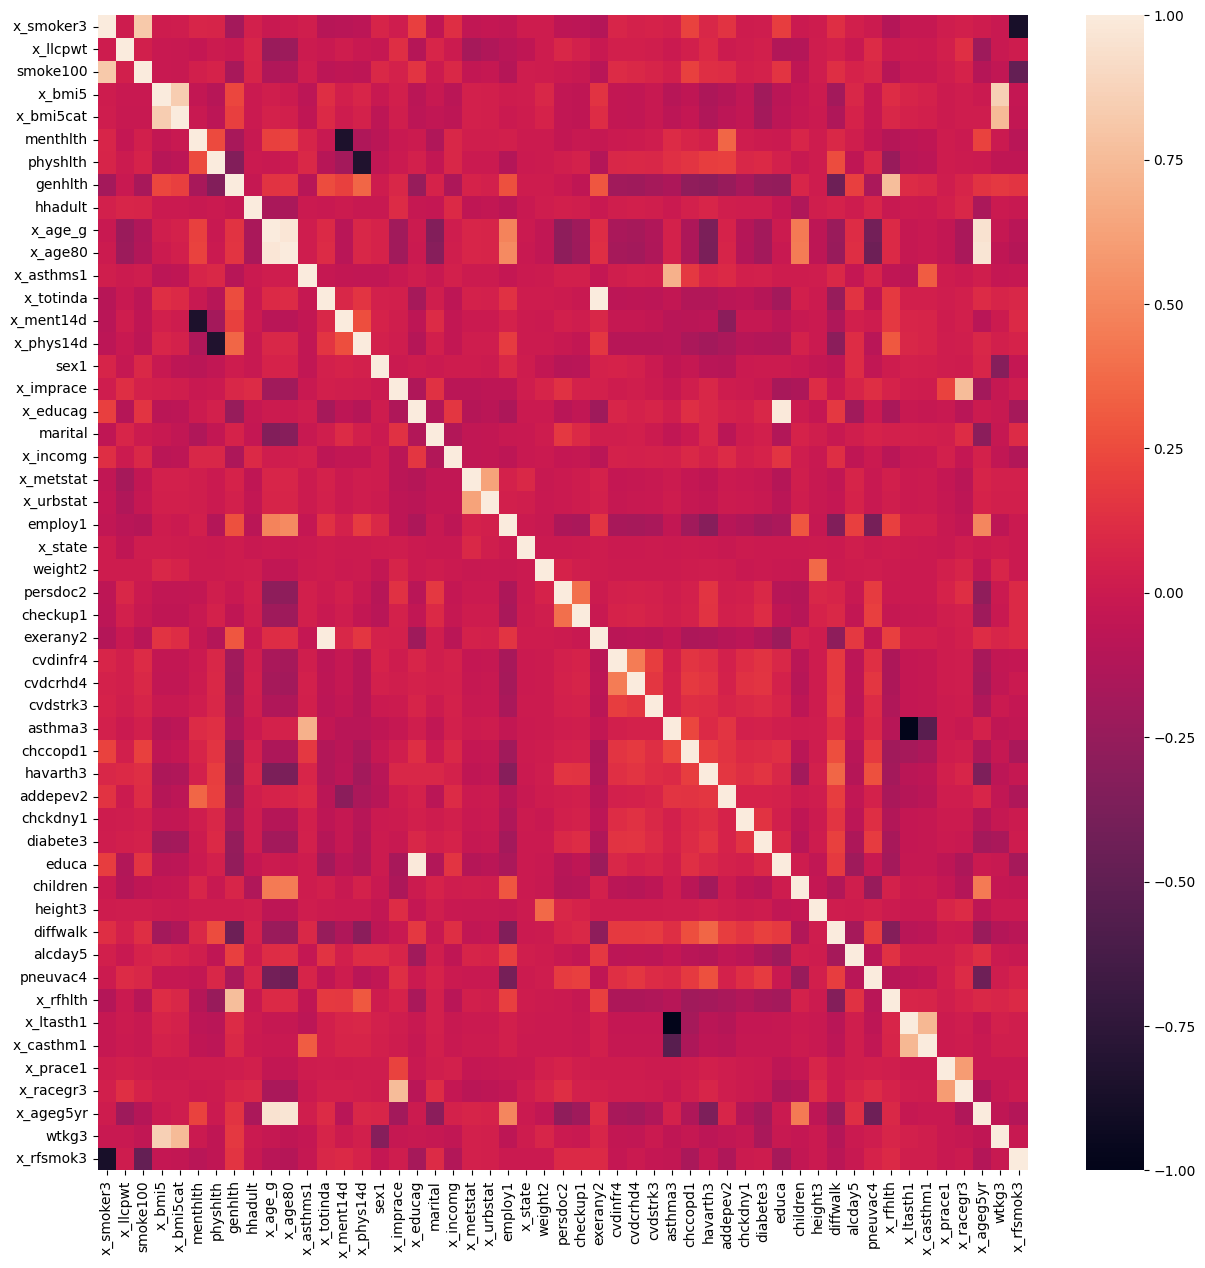

In [ ]:
correlation = df[res_na.index].corr()

plt.figure(figsize=(15,15))
sns.heatmap(df[res_na.index].corr())
plt.show()


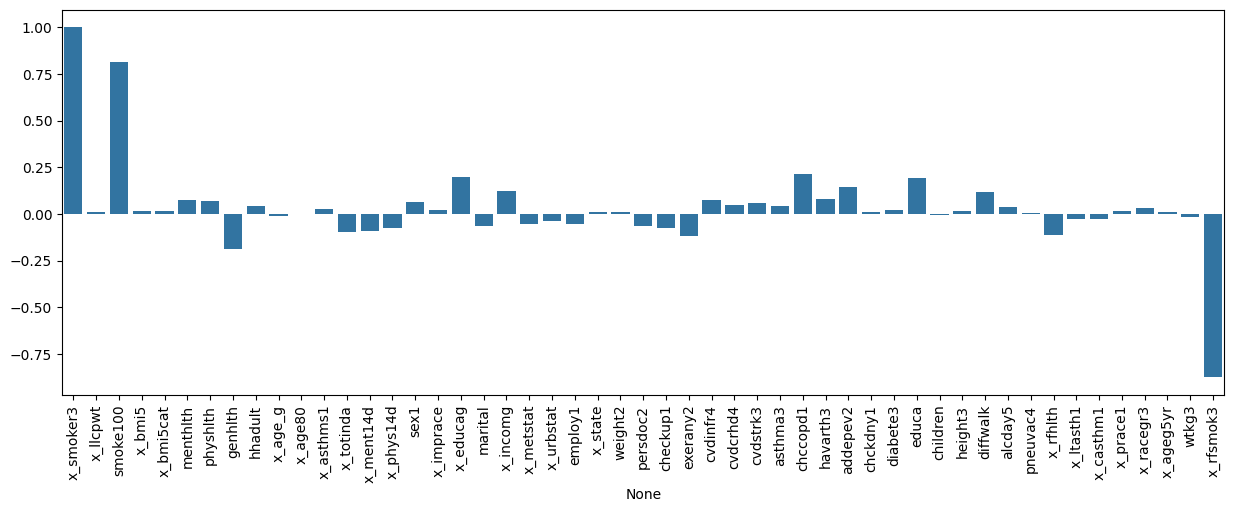

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_smoker3.values, x=correlation.x_smoker3.index)
plt.xticks(rotation=90)
plt.show()


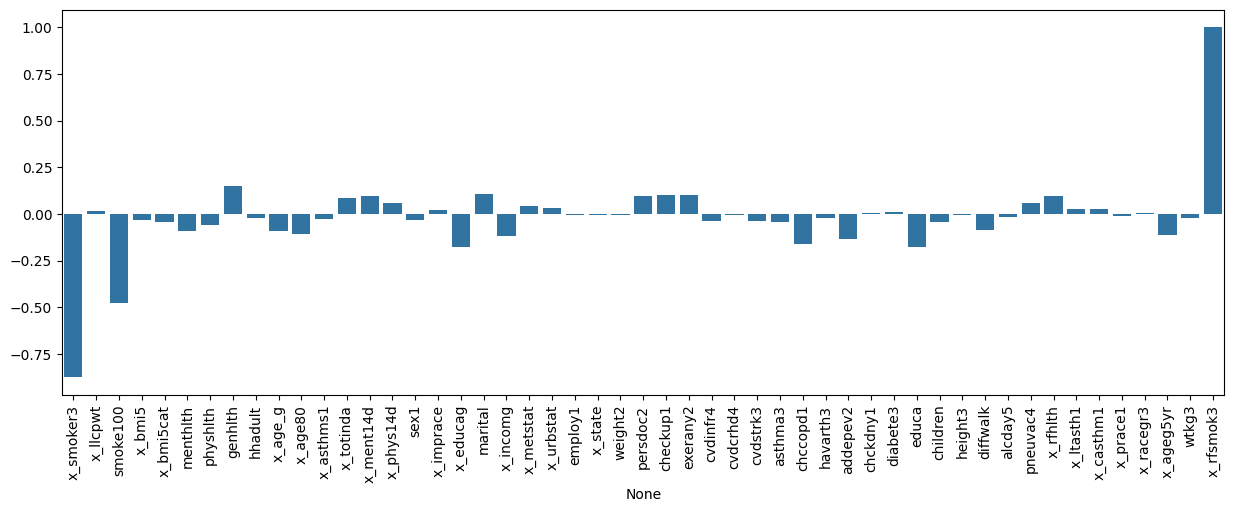

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_rfsmok3.values, x=correlation.x_rfsmok3.index)
plt.xticks(rotation=90)
plt.show()


In [16]:
# from res_na

numerical_features = [
    'x_llcpwt','x_age80','x_bmi5','weight2','wtkg3','height3',
    'children','hhadult','alcday5','menthlth','physhlth','poorhlth'
]

categorical_features = [
    'smoke100','x_bmi5cat','genhlth','x_age_g','x_asthms1','x_ltasth1','x_casthm1',
    'x_totinda','exerany2','x_ment14d','x_phys14d','sex1','x_imprace','x_prace1','x_racegr3',
    'x_educag','educa','marital','x_incomg','x_metstat','x_urbstat','employ1','x_state',
    'persdoc2','checkup1','cvdinfr4','cvdcrhd4','cvdstrk3','asthma3','chccopd1','havarth3','addepev2',
    'chckdny1','diabete3','diffwalk','pneuvac4','x_rfhlth','x_rfsmok3','x_ageg5yr'
]

len(numerical_features+categorical_features)


51

In [17]:
categorical_features.remove("smoke100")
categorical_features.remove("x_rfsmok3")
numerical_features.remove("x_llcpwt")

len(numerical_features+categorical_features)


48

In [18]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),                # پر کردن مقادیر گمشده عددی با میانگین
    ('scaler', StandardScaler())                                # مقیاس‌بندی ویژگی‌های عددی
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),       # پر کردن مقادیر گمشده متنی/منطقی با مد (پرتکرارترین)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'
)


In [ ]:
df_binary = df.copy()

df_binary['x_smoker3'].replace(4, np.nan, inplace=True)

df_binary.dropna(subset=['x_smoker3'], inplace=True)

df_binary['x_smoker3'] = df_binary['x_smoker3'].astype(int)
mapping_dict = {
    1: 0,
    2: 0,
    3: 1
}
df_binary['x_smoker3'] = df_binary['x_smoker3'].map(mapping_dict)

df_binary['x_smoker3'].value_counts()


,count
x_smoker3,
1,118754
0,61272


In [ ]:
X = df_binary[numerical_features+categorical_features]
y = df_binary["x_smoker3"]


In [21]:
scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]
scale_pos_weight


np.float64(0.5159573572258619)

In [22]:
X_processed = preprocessor.fit_transform(X)
print(f"\nShape of data after preprocessing: {X_processed.shape}")

feature_names_processed = preprocessor.get_feature_names_out()
print(f"Number of features after preprocessing: {len(feature_names_processed)}")

feature_names_processed



Shape of data after preprocessing: (180026, 48)
Number of features after preprocessing: 48


array(['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3',
       'num__height3', 'num__children', 'num__hhadult', 'num__alcday5',
       'num__menthlth', 'num__physhlth', 'num__poorhlth',
       'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1',
       'cat__x_ltasth1', 'cat__x_casthm1', 'cat__x_totinda',
       'cat__exerany2', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1',
       'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3',
       'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg',
       'cat__x_metstat', 'cat__x_urbstat', 'cat__employ1', 'cat__x_state',
       'cat__persdoc2', 'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4',
       'cat__cvdstrk3', 'cat__asthma3', 'cat__chccopd1', 'cat__havarth3',
       'cat__addepev2', 'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk',
       'cat__pneuvac4', 'cat__x_rfhlth', 'cat__x_ageg5yr'], dtype=object)

In [23]:
X_processed_df = pd.DataFrame(X_processed, columns=numerical_features+categorical_features)


In [ ]:
weights = df_binary["x_llcpwt"]


## Feature Engineering

In [25]:
# Define the full pipeline for preprocessing + feature selection
k=30
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=k))       # Select top K best features
])

feature_selection_pipeline.fit(X, y)

# Get the scores for each feature
feature_scores = feature_selection_pipeline.named_steps['selector'].scores_

numerical_feature_names = numerical_features
# Get one-hot encoded feature names
onehot_features = feature_selection_pipeline.named_steps['preprocessor'].named_transformers_['cat']
categorical_feature_names_onehot = onehot_features.get_feature_names_out(categorical_features)

# Combine all processed feature names
all_processed_feature_names = list(numerical_feature_names) + list(categorical_feature_names_onehot)

feature_scores_series = pd.Series(feature_scores, index=all_processed_feature_names)
sorted_features = feature_scores_series.sort_values(ascending=False)
selected_features_names = sorted_features.head(feature_selection_pipeline.named_steps['selector'].k).index.tolist()

print(f"Method used for Feature Selection: SelectKBest with f_classif (selecting top {feature_selection_pipeline.named_steps['selector'].k} features)")
print("\nTop features based on f_classif score:")
print(sorted_features.head(30))

print(f"\nSelected {feature_selection_pipeline.named_steps['selector'].k} Features:")
print(selected_features_names)


Method used for Feature Selection: SelectKBest with f_classif (selecting top 30 features)

Top features based on f_classif score:
x_age80      18758.874974
x_ageg5yr    18423.165775
x_age_g      16079.662448
marital       7194.955603
educa         6260.939946
x_educag      6231.439372
pneuvac4      4774.912583
persdoc2      4586.921627
checkup1      4177.424408
addepev2      3129.314508
x_incomg      3112.702831
menthlth      2945.117785
children      2750.358919
genhlth       2584.402223
x_ment14d     2358.385941
exerany2      1667.101926
employ1       1628.902395
x_bmi5cat     1467.638463
chccopd1      1405.554582
x_imprace     1229.233474
x_totinda     1214.004458
x_rfhlth       984.171588
wtkg3          947.890181
x_bmi5         884.800962
havarth3       623.120121
diabete3       596.868842
physhlth       570.666017
x_racegr3      532.496689
cvdcrhd4       508.304058
x_phys14d      378.541874
dtype: float64

Selected 30 Features:
['x_age80', 'x_ageg5yr', 'x_age_g', 'marital', 'educ

Method 2: Recursive Feature Elimination (RFE)

In [ ]:
# Initialize RFE. Select a base estimator and specify the number of features to select.
rfe_selector = RFE(estimator=LogisticRegression(random_state=42, max_iter=200), n_features_to_select=7)

# Fit RFE on the processed data (X_processed) and the target (y)
rfe_selector.fit(X_processed, y)

# Get the boolean mask of selected features and their ranking
selected_features_mask_rfe = rfe_selector.support_
feature_ranking_rfe = rfe_selector.ranking_

# Get the names of the selected features based on the mask
selected_features_names_rfe = feature_names_processed[selected_features_mask_rfe].tolist()

print("Selected features by RFE:")
print(selected_features_names_rfe)


Method 3: Feature Importance from RandomForestClassifier

In [27]:
rf_model_for_importance = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the processed data (X_processed) and the target (y)
rf_model_for_importance.fit(X_processed, y, sample_weight=weights)

# Get the feature importances from the fitted model
feature_importances_rf = rf_model_for_importance.feature_importances_

feature_importances_series_rf = pd.Series(feature_importances_rf, index=feature_names_processed)
sorted_feature_importances_rf = feature_importances_series_rf.sort_values(ascending=False)

print("Top features based on RandomForest feature importance:")
print(sorted_feature_importances_rf.head(20))

top_k_features_names_rf = sorted_feature_importances_rf.head(20).index.tolist()

print(f"\nTop 20 feature names selected by RandomForest importance:")
print(top_k_features_names_rf)


Top features based on RandomForest feature importance:
num__x_age80      0.074035
num__x_bmi5       0.066380
cat__x_state      0.055567
num__weight2      0.052694
num__wtkg3        0.052419
cat__x_ageg5yr    0.047067
num__height3      0.045490
num__alcday5      0.037890
cat__marital      0.037193
cat__x_incomg     0.036313
cat__x_age_g      0.028234
num__hhadult      0.027946
cat__x_educag     0.025029
cat__genhlth      0.024431
cat__educa        0.023983
num__menthlth     0.023619
num__poorhlth     0.023574
cat__employ1      0.023472
num__physhlth     0.022792
cat__checkup1     0.019244
dtype: float64

Top 20 feature names selected by RandomForest importance:
['num__x_age80', 'num__x_bmi5', 'cat__x_state', 'num__weight2', 'num__wtkg3', 'cat__x_ageg5yr', 'num__height3', 'num__alcday5', 'cat__marital', 'cat__x_incomg', 'cat__x_age_g', 'num__hhadult', 'cat__x_educag', 'cat__genhlth', 'cat__educa', 'num__menthlth', 'num__poorhlth', 'cat__employ1', 'num__physhlth', 'cat__checkup1']


In [28]:
sorted_feature_importances_rf


,0
num__x_age80,0.074035
num__x_bmi5,0.066380
cat__x_state,0.055567
num__weight2,0.052694
num__wtkg3,0.052419
cat__x_ageg5yr,0.047067
num__height3,0.045490
num__alcday5,0.037890
cat__marital,0.037193
cat__x_incomg,0.036313


Variance Threshold

In [29]:
selector_vt = VarianceThreshold(threshold=0.5)

selected_features_mask_vt = selector_vt.fit(X_processed).get_support()
selected_features_names_vt = feature_names_processed[selected_features_mask_vt].tolist()

print(f"تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: {len(selected_features_names_vt)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_vt)


تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: 31
ویژگی‌های انتخاب شده:
['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3', 'num__height3', 'num__children', 'num__hhadult', 'num__alcday5', 'num__menthlth', 'num__physhlth', 'num__poorhlth', 'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_casthm1', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg', 'cat__employ1', 'cat__x_state', 'cat__persdoc2', 'cat__checkup1', 'cat__diabete3', 'cat__x_ageg5yr']


۲. Correlation Matrix (ماتریس همبستگی)
این روش برای کاهش همخطی چندگانه (Multicollinearity) استفاده می‌شود. ویژگی‌هایی که همبستگی بسیار بالایی با یکدیگر دارند را شناسایی و یکی از آن‌ها را حذف می‌کند. این کار به پایداری و تفسیرپذیری مدل‌های خطی کمک می‌کند.

In [30]:
# محاسبه ماتریس همبستگی. abs() برای در نظر گرفتن همبستگی مثبت و منفی.
corr_matrix = X_processed_df.corr().abs()

# انتخاب مثلث بالایی ماتریس همبستگی برای جلوگیری از تکرار و مقادیر روی قطر اصلی
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 0.9 یک آستانه رایج است، می‌توانید آن را تغییر دهید.
to_drop_high_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# ویژگی‌های باقی‌مانده (انتخاب‌شده)
selected_features_names_corr = [col for col in feature_names_processed if col not in to_drop_high_corr]

print(f"ویژگی‌های حذف شده به دلیل همبستگی بالا (>0.9): {to_drop_high_corr}")
print(f"تعداد ویژگی‌های انتخاب شده بعد از حذف همبستگی بالا: {len(selected_features_names_corr)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_corr)


ویژگی‌های حذف شده به دلیل همبستگی بالا (>0.9): ['x_age_g', 'educa', 'x_ageg5yr']
تعداد ویژگی‌های انتخاب شده بعد از حذف همبستگی بالا: 48
ویژگی‌های انتخاب شده:
['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3', 'num__height3', 'num__children', 'num__hhadult', 'num__alcday5', 'num__menthlth', 'num__physhlth', 'num__poorhlth', 'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_ltasth1', 'cat__x_casthm1', 'cat__x_totinda', 'cat__exerany2', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1', 'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg', 'cat__x_metstat', 'cat__x_urbstat', 'cat__employ1', 'cat__x_state', 'cat__persdoc2', 'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4', 'cat__cvdstrk3', 'cat__asthma3', 'cat__chccopd1', 'cat__havarth3', 'cat__addepev2', 'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk', 'cat__pneuvac4', 'cat__x_rfhlth', 'cat__x_ageg5yr']


### VIF Method

In [ ]:
# def calculate_vif(df_features):
#     variables = df_features.copy()
#     threshold = 5.0

#     while True:
#         vif_df = pd.DataFrame()
#         vif_df["Feature"] = variables.columns

#         vif_df["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
#         max_vif = vif_df["VIF"].max()

#         if max_vif > threshold:
#             feature_with_max_vif = vif_df.sort_values(by="VIF", ascending=False).iloc[0]["Feature"]
#             print(f"remove feature'{feature_with_max_vif}' with VIF = {max_vif:.2f}")

#             variables = variables.drop(columns=[feature_with_max_vif])
#         else:
#             print(f"can't find any feature with vif bigger than {threshold}")
#             break

#     print("\n End of vif removing features process")
#     print(vif_df.sort_values(by="VIF", ascending=False))
#     return variables.columns.tolist()

# selected_features_vif = calculate_vif(X_processed_df)
# print(f"\nselected features with VIF method:")
# print(selected_features_vif)
# X_vif_selected = X_processed_df[selected_features_vif]


KeyboardInterrupt: 

In [ ]:
vif_less_than_7 = ['x_age80', 'x_bmi5', 'weight2', 'wtkg3', 'height3', 'children', 'hhadult', 'alcday5', 'menthlth', 'physhlth', 'poorhlth', 'x_casthm1', 'x_totinda', 'x_ment14d', 'x_phys14d', 'x_imprace', 'x_prace1', 'marital', 'x_incomg', 'employ1', 'x_state', 'persdoc2', 'checkup1', 'x_rfhlth']
X_processed_df_vif = X_processed_df[vif_less_than_7]
X_processed_df_vif.shape


In [ ]:
numerical_features_selected = [f for f in vif_less_than_7 if f in numerical_features]
categorical_features_selected = [f for f in vif_less_than_7 if f in categorical_features]

preprocessor_vif = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features_selected),
        ('cat', categorical_pipeline, categorical_features_selected)
    ],
    remainder='passthrough'
)

X_vif = df_binary[vif_less_than_7]


مدل‌های مبتنی بر درخت مانند Random Forest، XGBoost و LightGBM به هم‌خطی (Multicollinearity) حساسیت بسیار کمی دارند.

#### منحنی Precision-Recall

برای داده‌های نامتوازن، این نمودار اغلب آموزنده‌تر از ROC است، چون بر عملکرد مدل روی کلاس اقلیت (در اینجا، سیگاری‌های سابق) تمرکز می‌کند.

Precision: از بین تمام کسانی که مدل گفته "ترک کرده‌اند"، چند درصدشان واقعاً ترک کرده بودند؟

Recall: از بین تمام کسانی که واقعاً ترک کرده‌اند، مدل توانسته چند درصدشان را شناسایی کند؟

#### منحنی AUC-ROC

این منحنی، نرخ True Positive Rate (Recall) را در مقابل نرخ False Positive Rate در آستانه‌های مختلف طبقه‌بندی رسم می‌کند.

عملکرد ایده‌آل: منحنی‌ای که به گوشه بالا-چپ نزدیک‌تر است.

مقدار AUC: سطح زیر این منحنی. عددی بین ۰.۵ (مدل تصادفی) و ۱.۰ (مدل کامل). هر چه به ۱ نزدیک‌تر باشد، بهتر است.

# White/Black box models on VIF/ALL features

In [33]:
def run_full_analysis(model_name, model_constructor_func, preprocessor_instance, X_data, y_data, weights_data):
    model_instance = model_constructor_func()

    # split data
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_data)
    target_names_original = le.inverse_transform(np.unique(y_encoded)).astype(str)
    X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
        X_data, y_encoded, weights_data, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # pipline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_instance),
        ('classifier', model_instance)
    ])

    print(f"\n===== Training model: {model_name} =====")
    start_time = time.time()
    if isinstance(model_instance, LDA):
        print("Model is LDA, fitting without sample_weight.")
        pipeline.fit(X_train, y_train)
    else:
        # other model train with weights
        pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)
    training_time = time.time() - start_time


    # evaluate
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba)

    print(f"Training completed in {training_time:.2f} seconds.")
    print(f"Accuracy: {accuracy:.4f} | F1-Score: {f1:.4f} | AUC: {auc:.4f}")


    # Evaluation plots
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    fig.suptitle(f"Evaluation for {model_name}", fontsize=16)
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[0], cmap=plt.cm.Blues)
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[1])
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[2])
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


    # analysis for each model
    fitted_preprocessor = pipeline.named_steps['preprocessor']
    final_model = pipeline.named_steps['classifier']
    feature_names = fitted_preprocessor.get_feature_names_out()

    if isinstance(final_model, (LogisticRegression, LDA)):
        print("\n--- Coefficient Analysis ---")
        coefficients = final_model.coef_[0]
        feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
        if isinstance(final_model, LogisticRegression):
            feature_importance['Odds_Ratio'] = np.exp(coefficients)

        # sort by abs of coeff
        feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
        print(feature_importance.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient'))

    elif isinstance(final_model, DecisionTreeClassifier):
        print("\n--- Decision Tree Analysis ---")
        plt.figure(figsize=(40, 20))
        plot_tree(final_model, feature_names=feature_names, class_names=target_names_original,
                  filled=True, rounded=True, fontsize=7, max_depth=5)
        plt.title(f"Decision Tree for {model_name}")
        plt.show()

        # show tree conditions in text
        tree_rules = export_text(final_model, feature_names=list(feature_names))
        print("Tree Rules (first few levels):\n", "\n".join(tree_rules.splitlines()[:20]))

    elif isinstance(final_model, (xgb.XGBClassifier, lgb.LGBMClassifier, cb.CatBoostClassifier)):
        print(f"\n--- SHAP Analysis for {model_name} ---")
        X_test_transformed = fitted_preprocessor.transform(X_test)
        X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)
        explainer = shap.TreeExplainer(final_model)
        shap_values = explainer.shap_values(X_test_transformed_df)

        shap.summary_plot(shap_values, X_test_transformed_df, show=False)
        plt.title(f'SHAP Summary Plot - {model_name}')
        plt.show()

    return {'Model': model_name, 'Accuracy': accuracy, 'F1-Score': f1, 'AUC': auc, 'Time (s)': training_time}

# models
models_to_run_full_suite = {
    # Boosting Models
    'XGBoost': lambda: xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42),
    'LightGBM': lambda: lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight, random_state=42),
    'CatBoost': lambda: cb.CatBoostClassifier(scale_pos_weight=scale_pos_weight, random_state=42, verbose=0),

    # Classic & Interpretable Models
    'Logistic Regression': lambda: LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': lambda: DecisionTreeClassifier(max_depth=7, random_state=42, min_samples_split=20, min_samples_leaf=10),
    'LDA': lambda: LDA()
}

# store results
vif_results = []
all_features_results = []



Analysis with VIF Selected Features

===== Training model: XGBoost (VIF) =====
Training completed in 2.59 seconds.
Accuracy: 0.6926 | F1-Score: 0.6992 | AUC: 0.7566


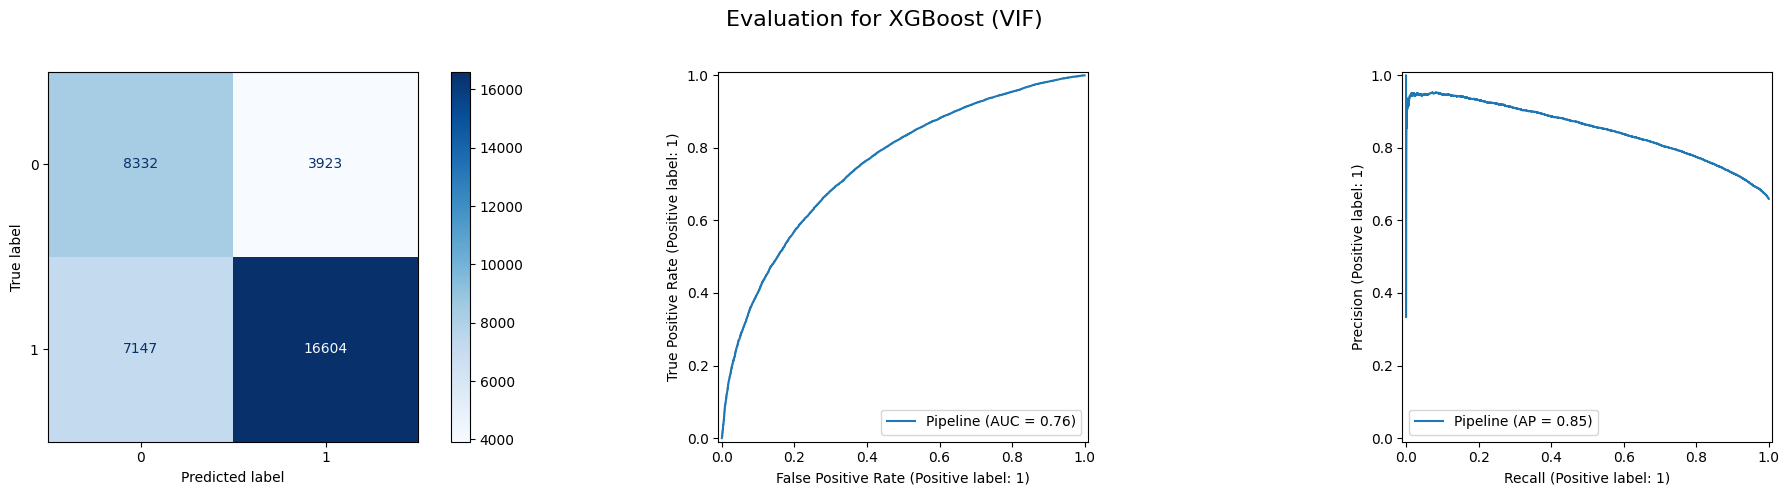


--- SHAP Analysis for XGBoost (VIF) ---


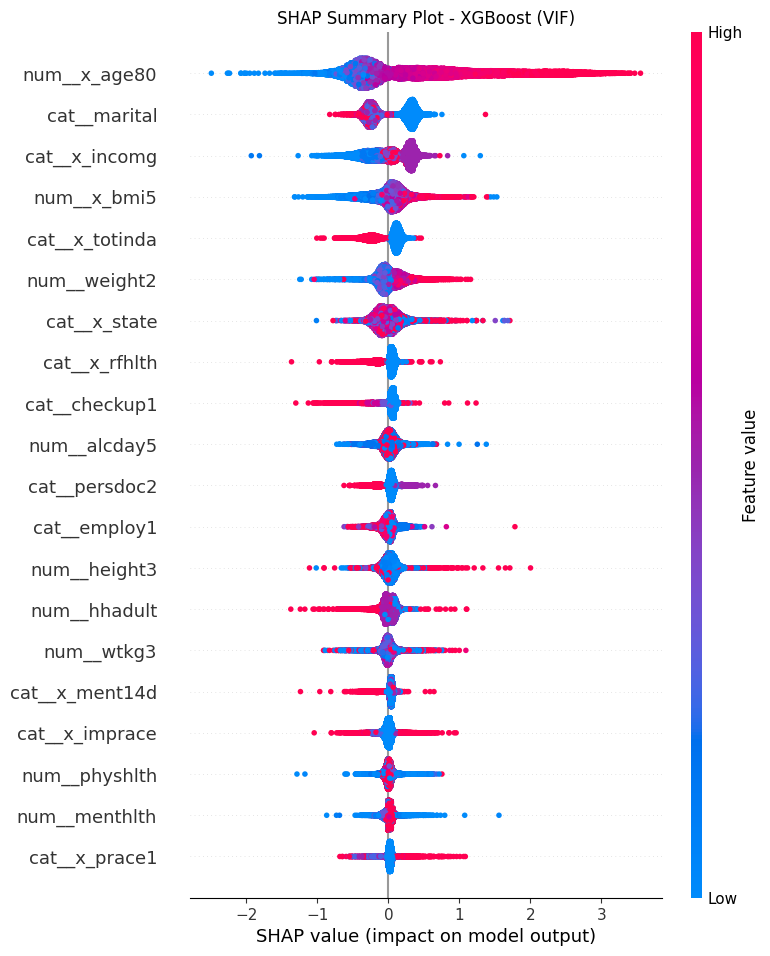


===== Training model: LightGBM (VIF) =====
[LightGBM] [Info] Number of positive: 95003, number of negative: 49017
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1213
[LightGBM] [Info] Number of data points in the train set: 144020, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.609519 -> initscore=0.445293
[LightGBM] [Info] Start training from score 0.445293
Training completed in 3.55 seconds.
Accuracy: 0.6980 | F1-Score: 0.7053 | AUC: 0.7705


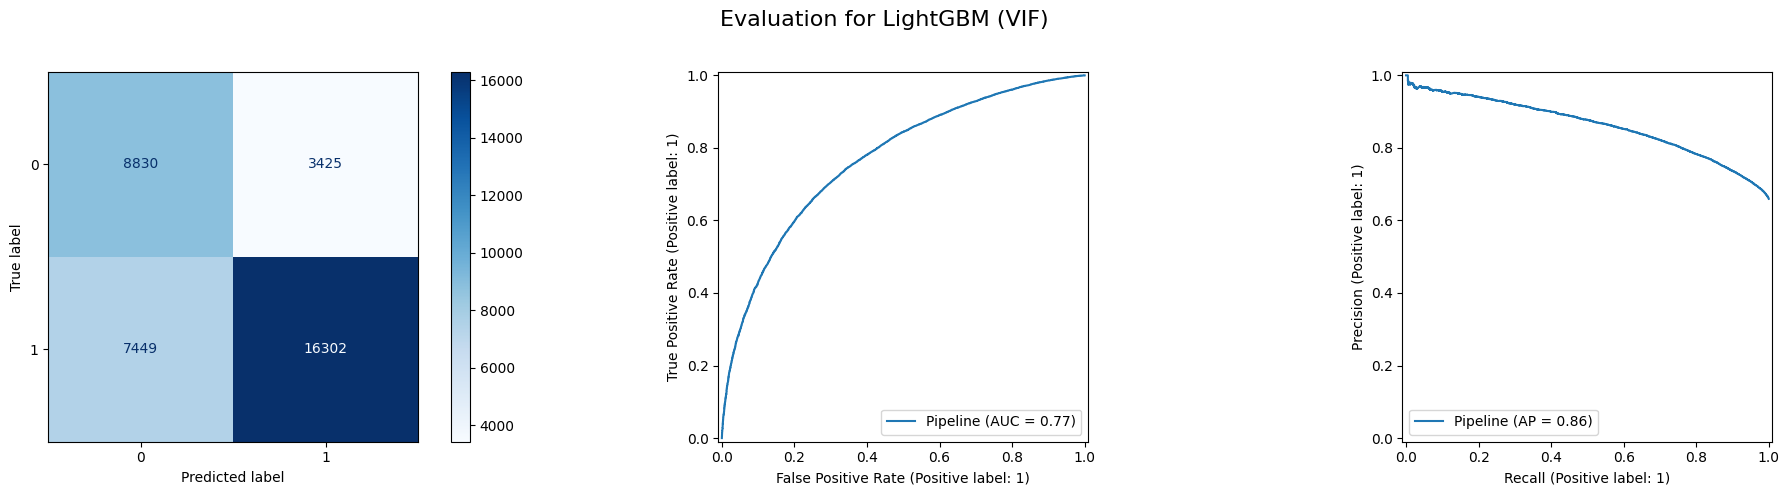


--- SHAP Analysis for LightGBM (VIF) ---


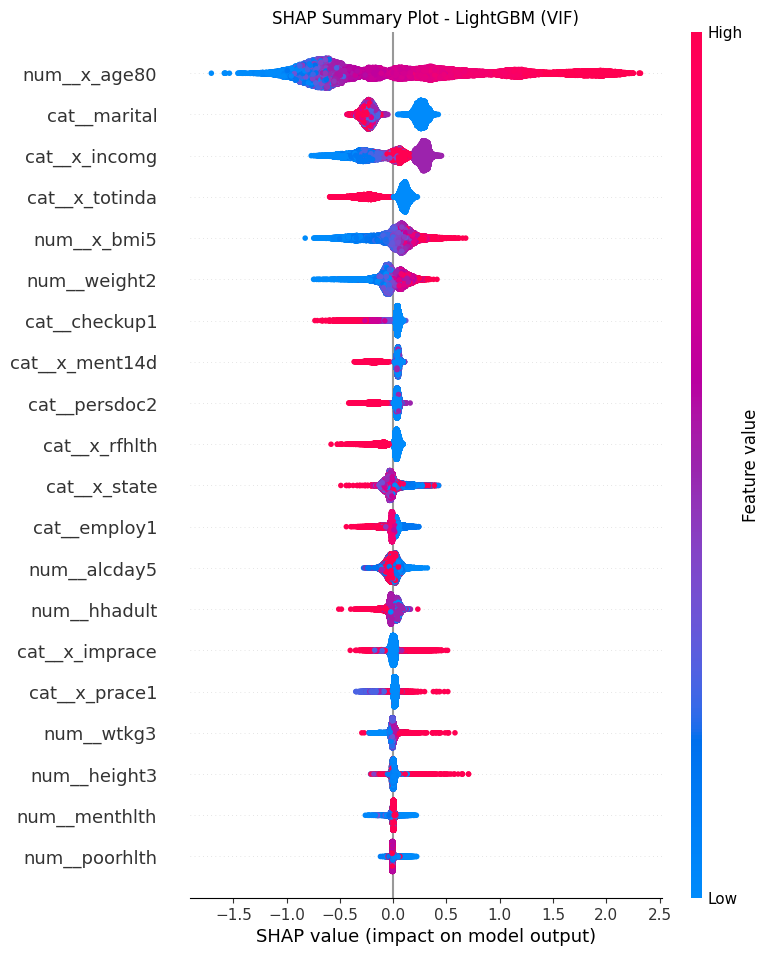


===== Training model: CatBoost (VIF) =====
Training completed in 65.27 seconds.
Accuracy: 0.7004 | F1-Score: 0.7070 | AUC: 0.7684


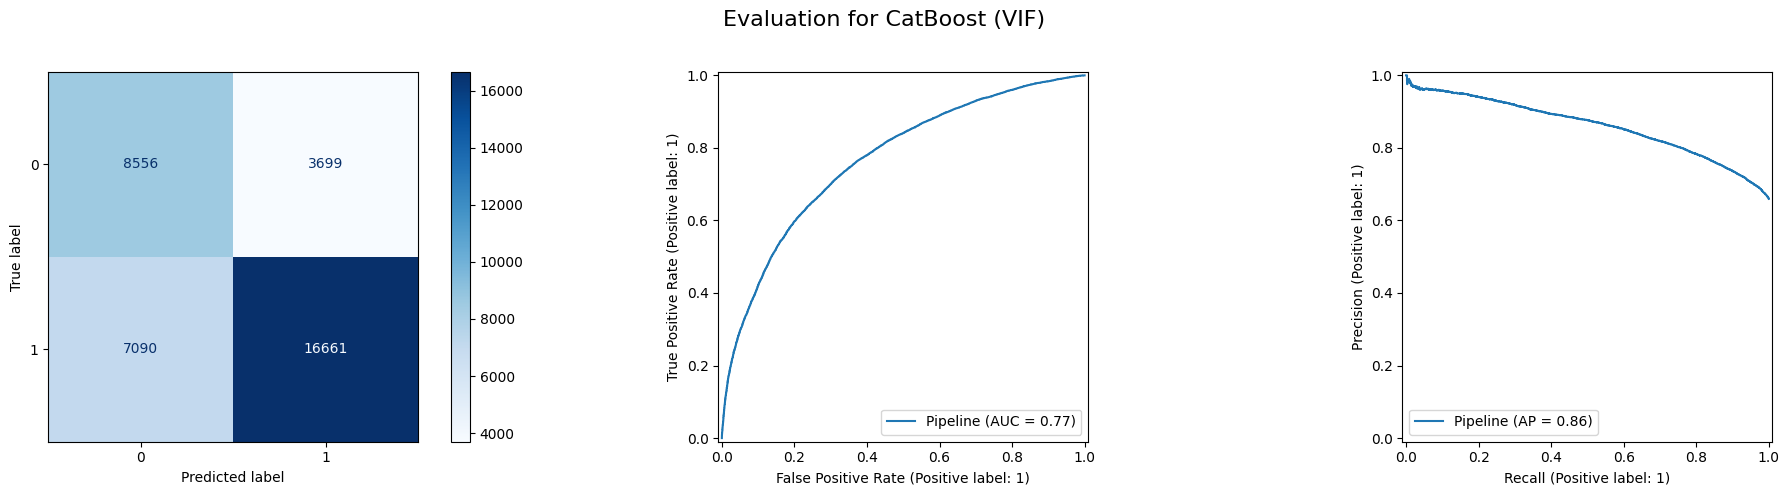


--- SHAP Analysis for CatBoost (VIF) ---


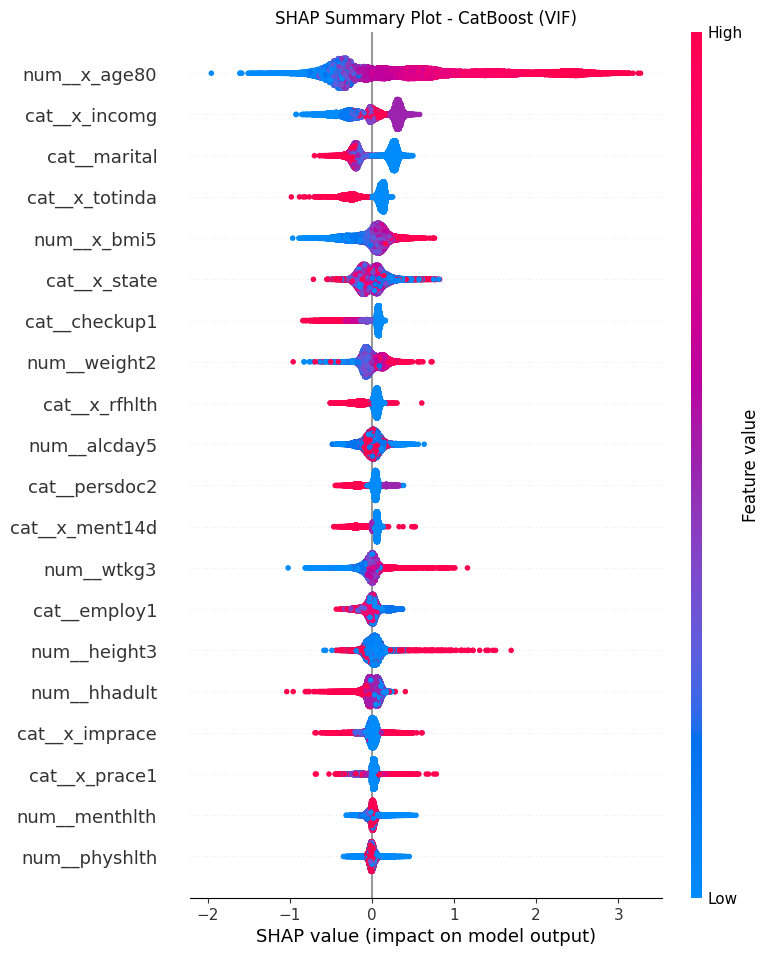


===== Training model: Logistic Regression (VIF) =====
Training completed in 9.46 seconds.
Accuracy: 0.7028 | F1-Score: 0.6736 | AUC: 0.7393


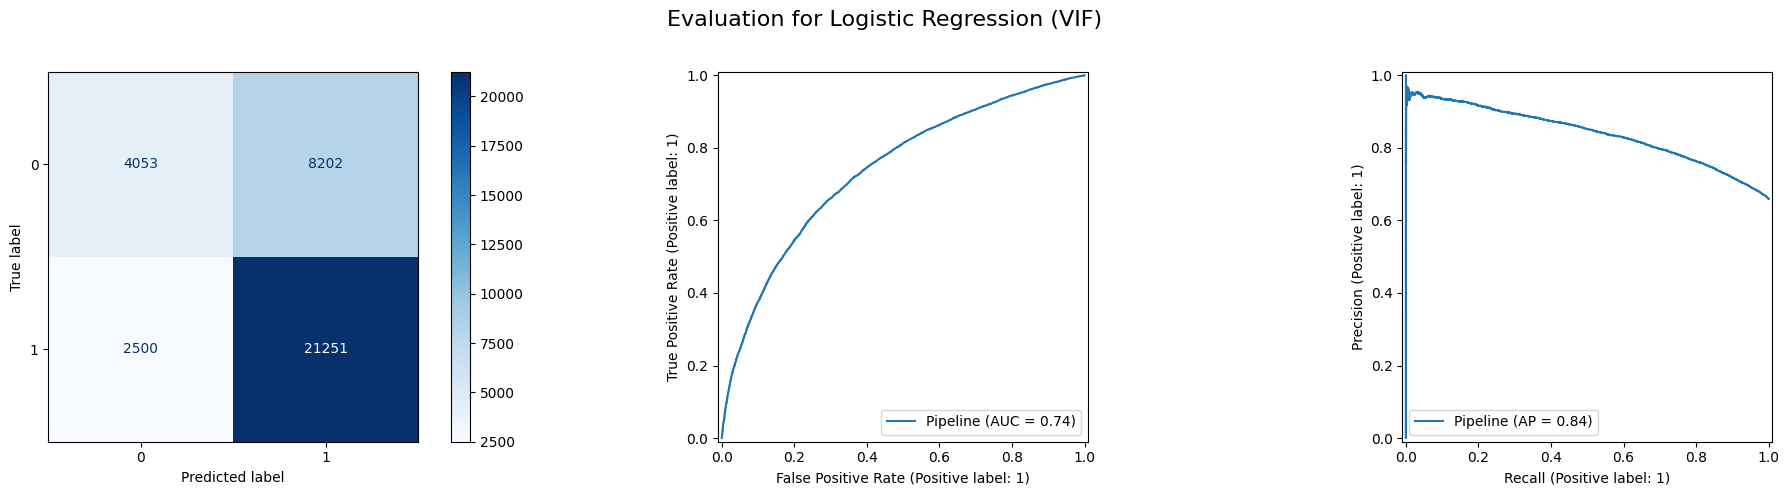


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.574333    1.775946
12  cat__x_totinda    -0.355087    0.701113
23   cat__x_rfhlth    -0.183805    0.832098
22   cat__checkup1    -0.132063    0.876286
17    cat__marital    -0.114746    0.891593
21   cat__persdoc2    -0.099003    0.905740
3       num__wtkg3     0.084959    1.088672
1      num__x_bmi5     0.078732    1.081914
18   cat__x_incomg     0.073320    1.076075
13  cat__x_ment14d    -0.067352    0.934866
7     num__alcday5    -0.046423    0.954638
11  cat__x_casthm1    -0.040651    0.960165
4     num__height3     0.039505    1.040296
19    cat__employ1    -0.033321    0.967228
9    num__physhlth     0.030765    1.031243
6     num__hhadult    -0.026399    0.973946
5    num__children    -0.025359    0.974959
15  cat__x_imprace     0.016672    1.016812
8    num__menthlth     0.014743    1.014852
10   num__poorhlth     0.011310    1.011374
14  cat__x_phys14d    -0.007046    0.992979
2 

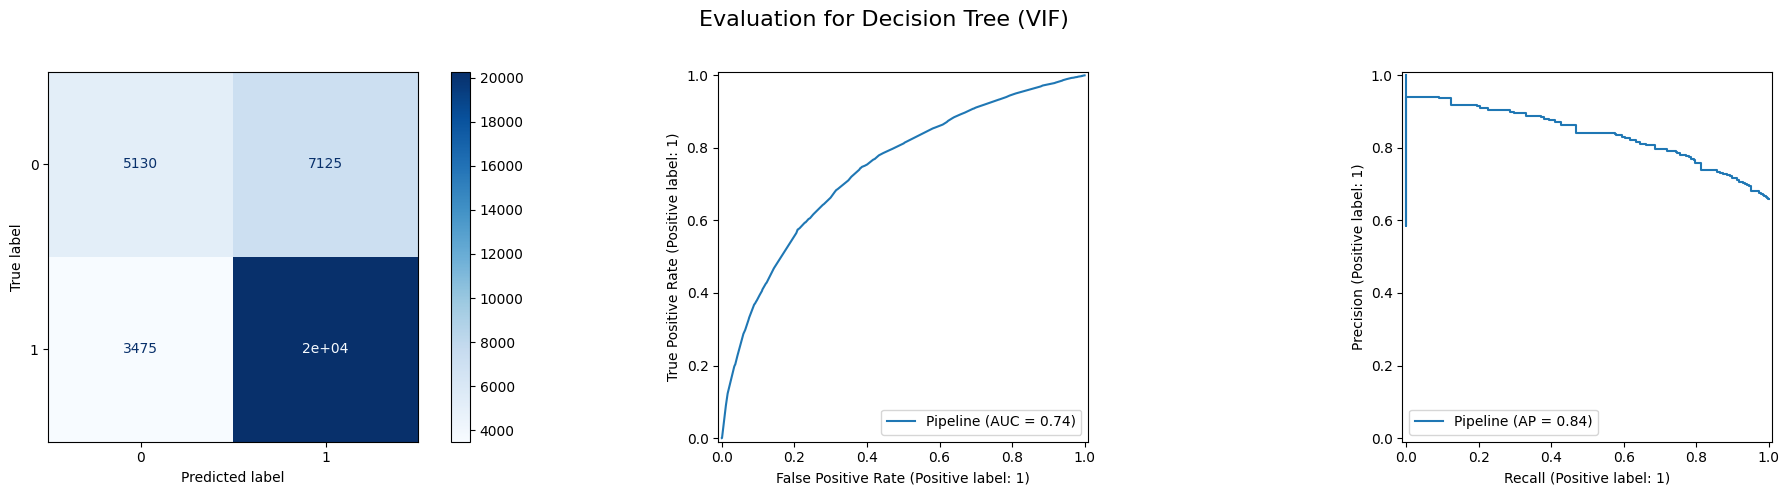


--- Decision Tree Analysis ---


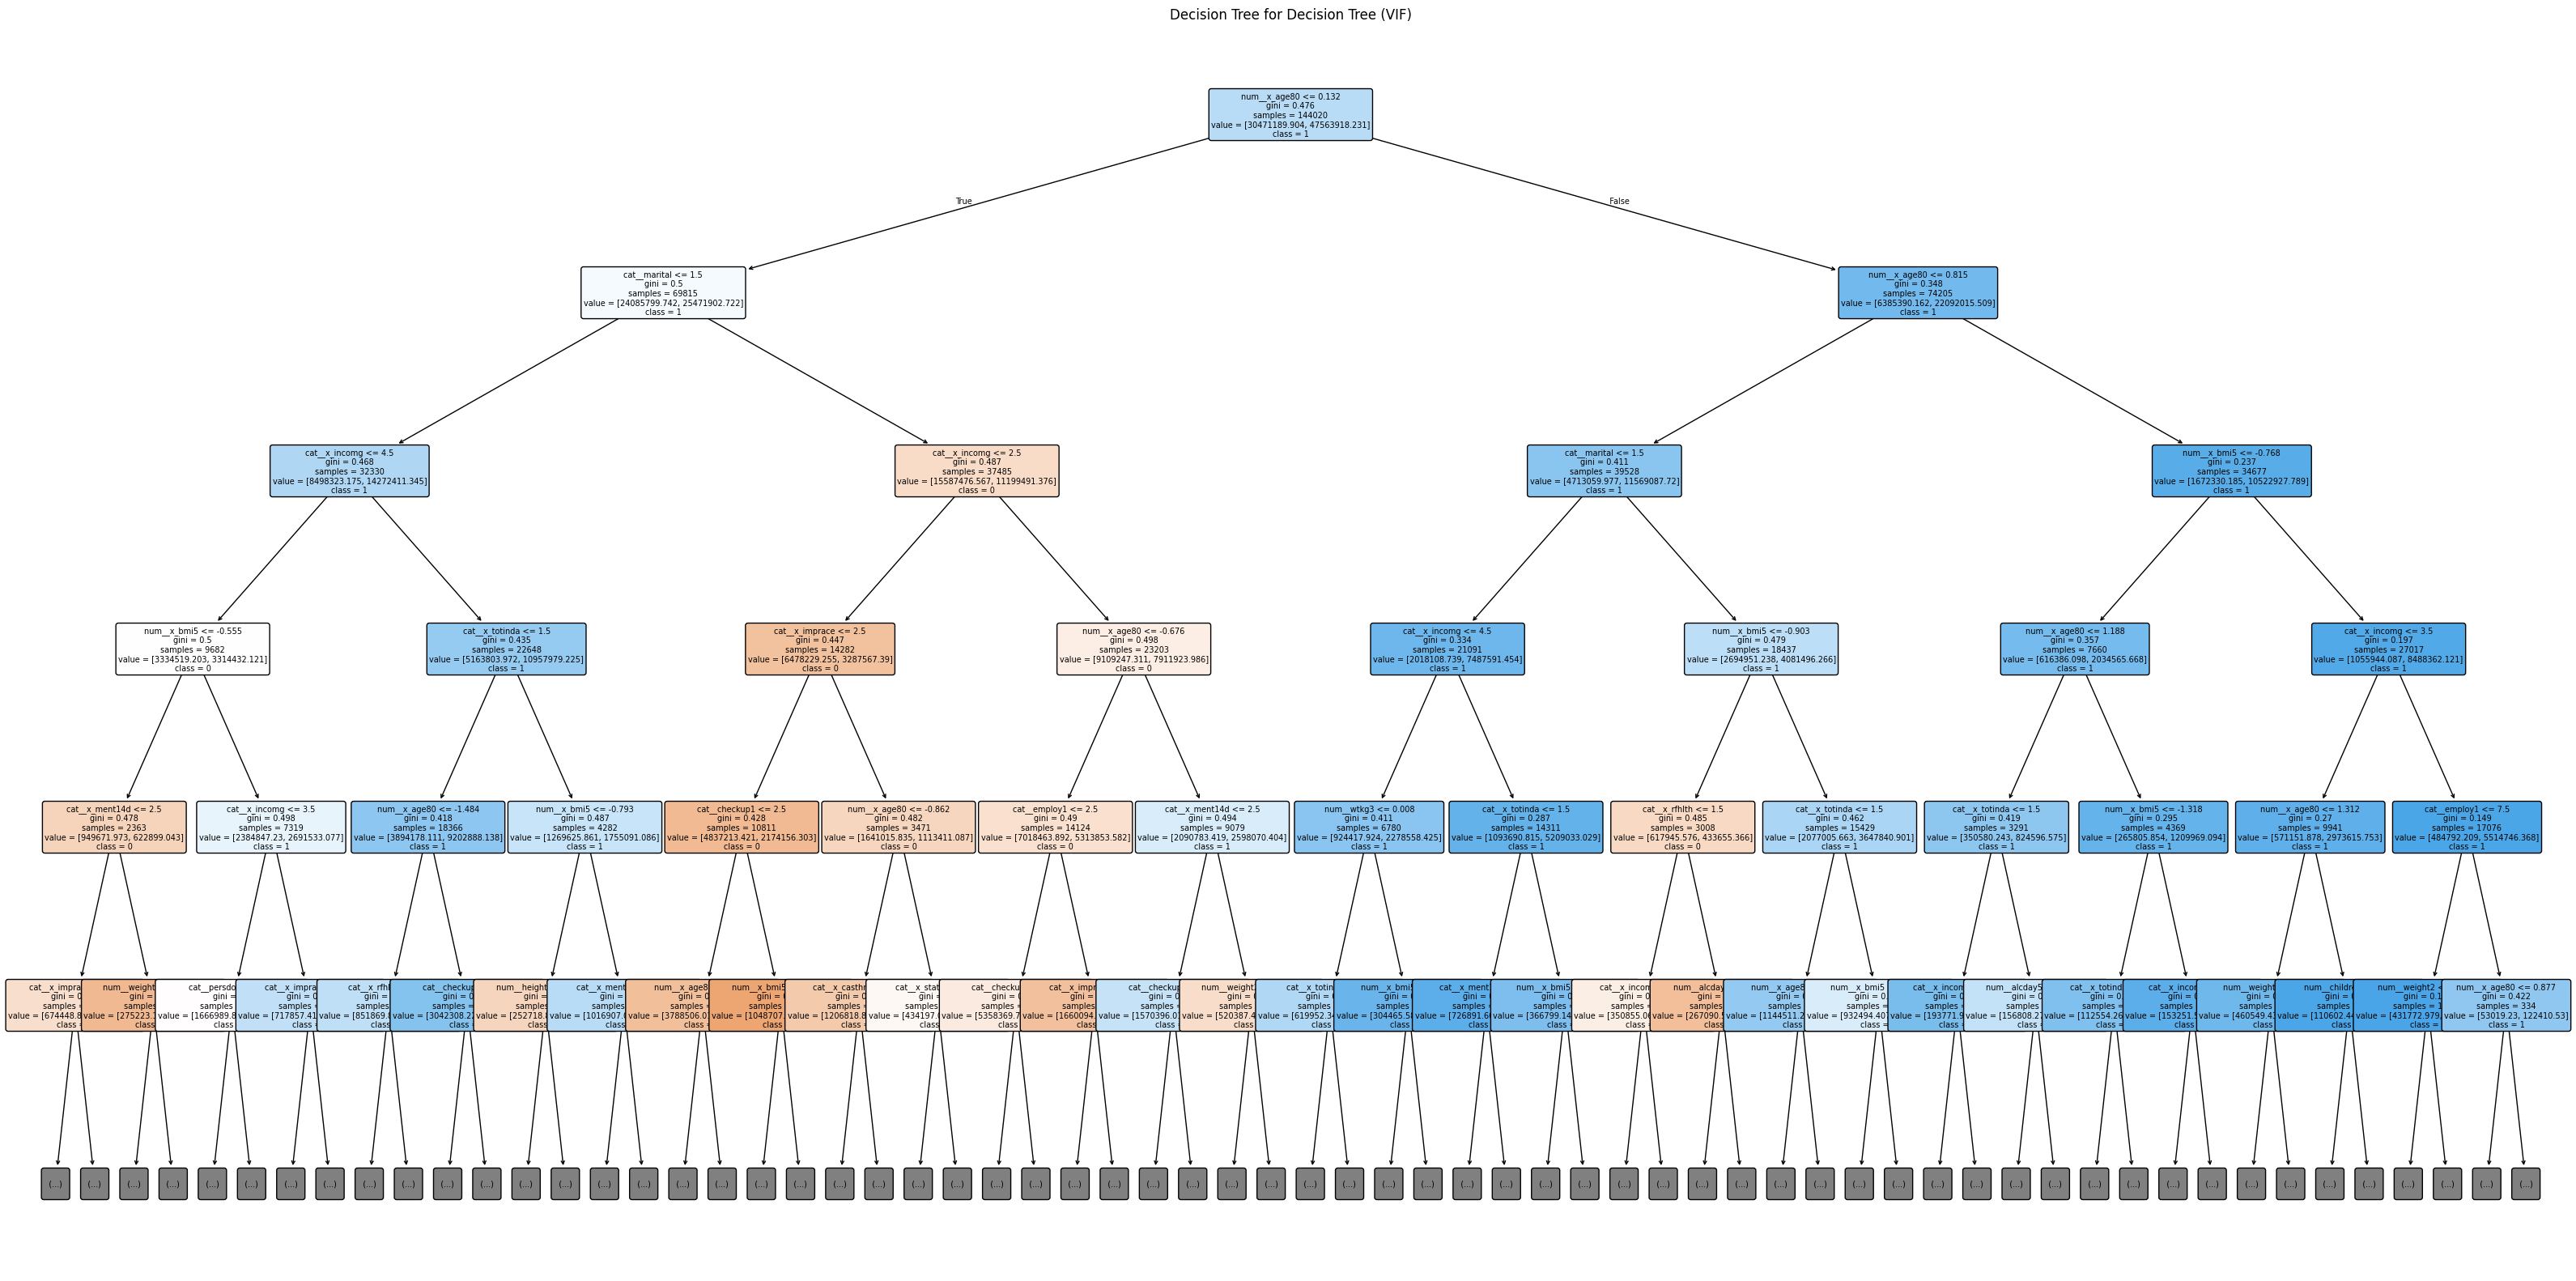

Tree Rules (first few levels):
 |--- num__x_age80 <= 0.13
|   |--- cat__marital <= 1.50
|   |   |--- cat__x_incomg <= 4.50
|   |   |   |--- num__x_bmi5 <= -0.55
|   |   |   |   |--- cat__x_ment14d <= 2.50
|   |   |   |   |   |--- cat__x_imprace <= 2.50
|   |   |   |   |   |   |--- num__x_bmi5 <= -1.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- num__x_bmi5 >  -1.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- cat__x_imprace >  2.50
|   |   |   |   |   |   |--- num__weight2 <= -0.16
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__weight2 >  -0.16
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- cat__x_ment14d >  2.50
|   |   |   |   |   |--- num__weight2 <= -0.17
|   |   |   |   |   |   |--- num__physhlth <= -1.18
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- num__physhlth >  -1.18

===== Training model: LDA (VIF) =====
Model is LDA, fitting without sample_weight.
Training

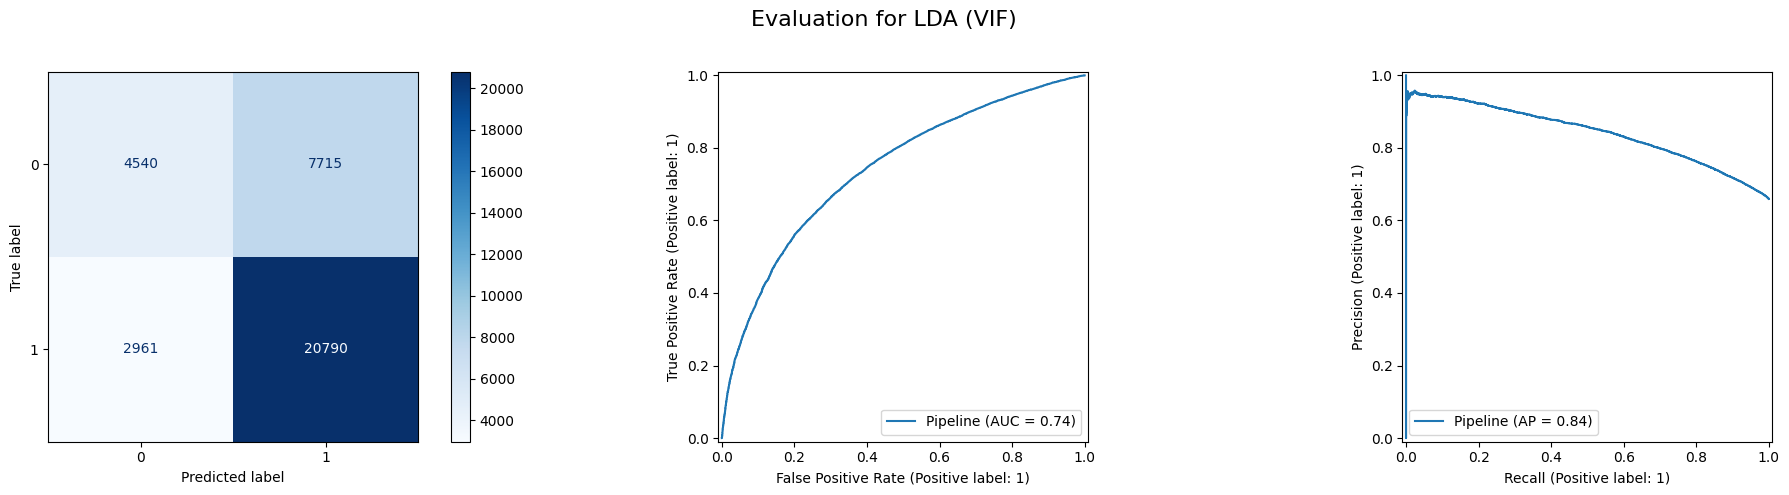


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     0.737966
12  cat__x_totinda    -0.387355
23   cat__x_rfhlth    -0.194719
22   cat__checkup1    -0.166914
3       num__wtkg3     0.162413
17    cat__marital    -0.121181
21   cat__persdoc2    -0.111055
1      num__x_bmi5     0.106569
18   cat__x_incomg     0.091175
13  cat__x_ment14d    -0.065794
7     num__alcday5    -0.062058
8    num__menthlth     0.034205
10   num__poorhlth     0.033825
5    num__children    -0.033352
19    cat__employ1    -0.032608
4     num__height3     0.032071
15  cat__x_imprace    -0.023673
9    num__physhlth     0.020012
11  cat__x_casthm1    -0.018377
6     num__hhadult    -0.017246
14  cat__x_phys14d    -0.016235
2     num__weight2    -0.005953
16   cat__x_prace1     0.001097
20    cat__x_state    -0.000655


In [34]:
# vif features
print("\nAnalysis with VIF Selected Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (VIF)", model_constructor, preprocessor_vif, X_vif, y, weights)
    vif_results.append(result)



Analysis with All Features

===== Training model: XGBoost (All Features) =====
Training completed in 6.07 seconds.
Accuracy: 0.7076 | F1-Score: 0.7137 | AUC: 0.7736


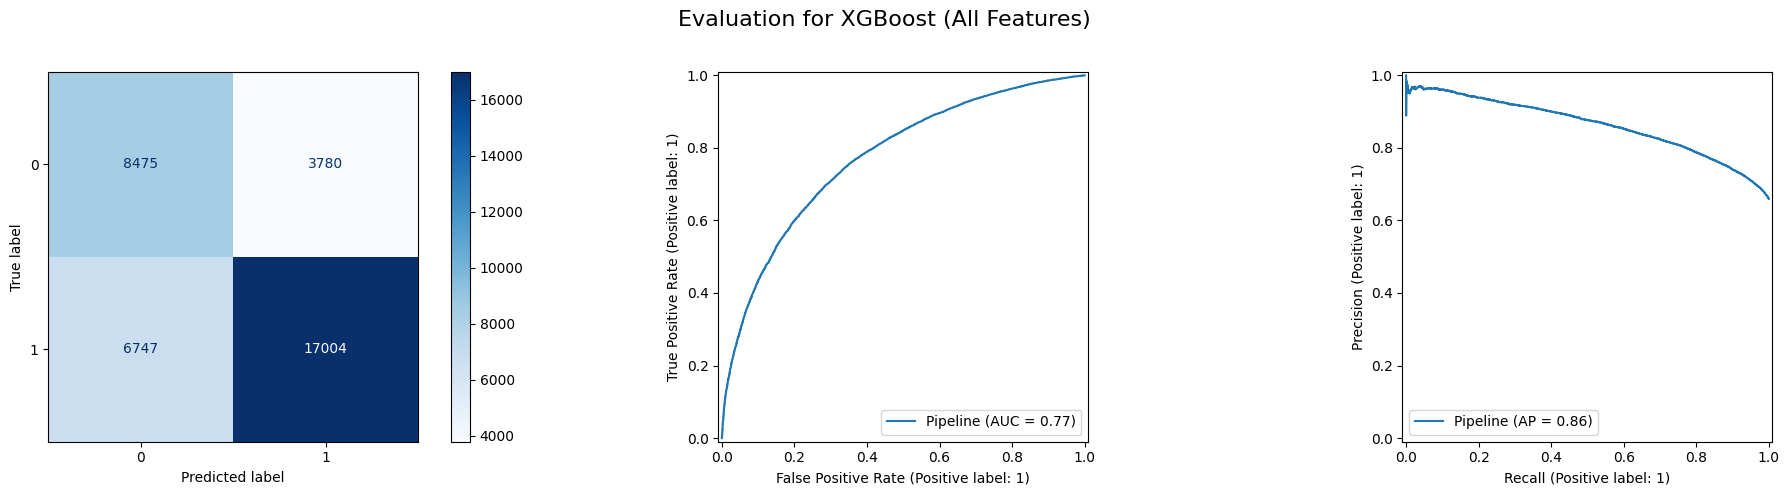


--- SHAP Analysis for XGBoost (All Features) ---


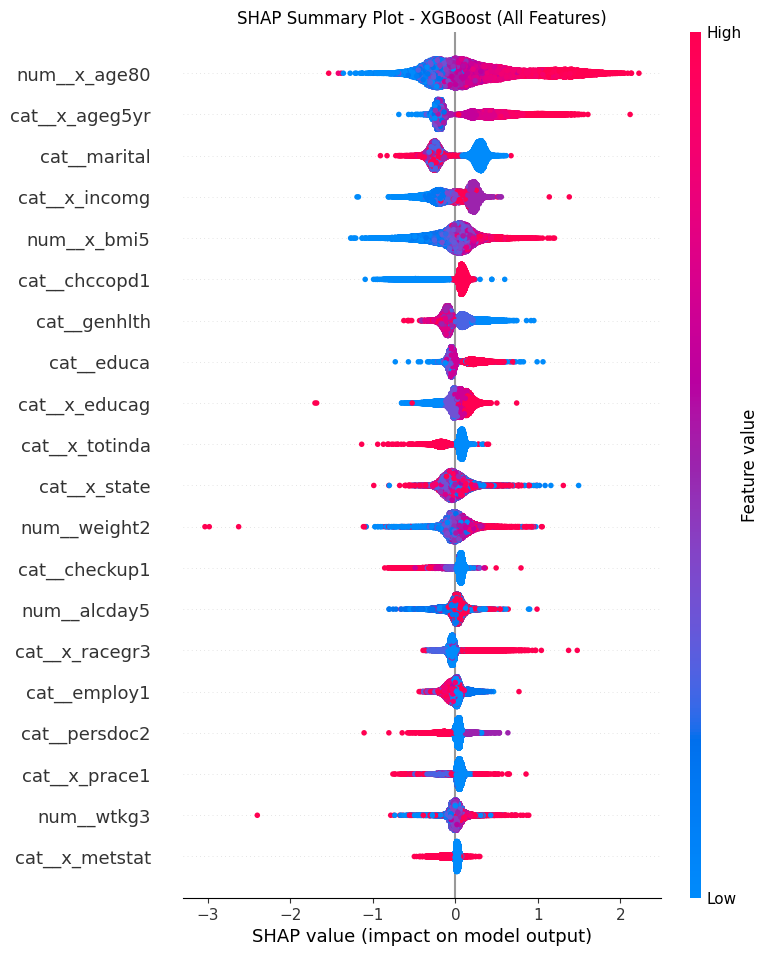


===== Training model: LightGBM (All Features) =====
[LightGBM] [Info] Number of positive: 95003, number of negative: 49017
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 144020, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.609519 -> initscore=0.445293
[LightGBM] [Info] Start training from score 0.445293
Training completed in 5.47 seconds.
Accuracy: 0.7115 | F1-Score: 0.7183 | AUC: 0.7858


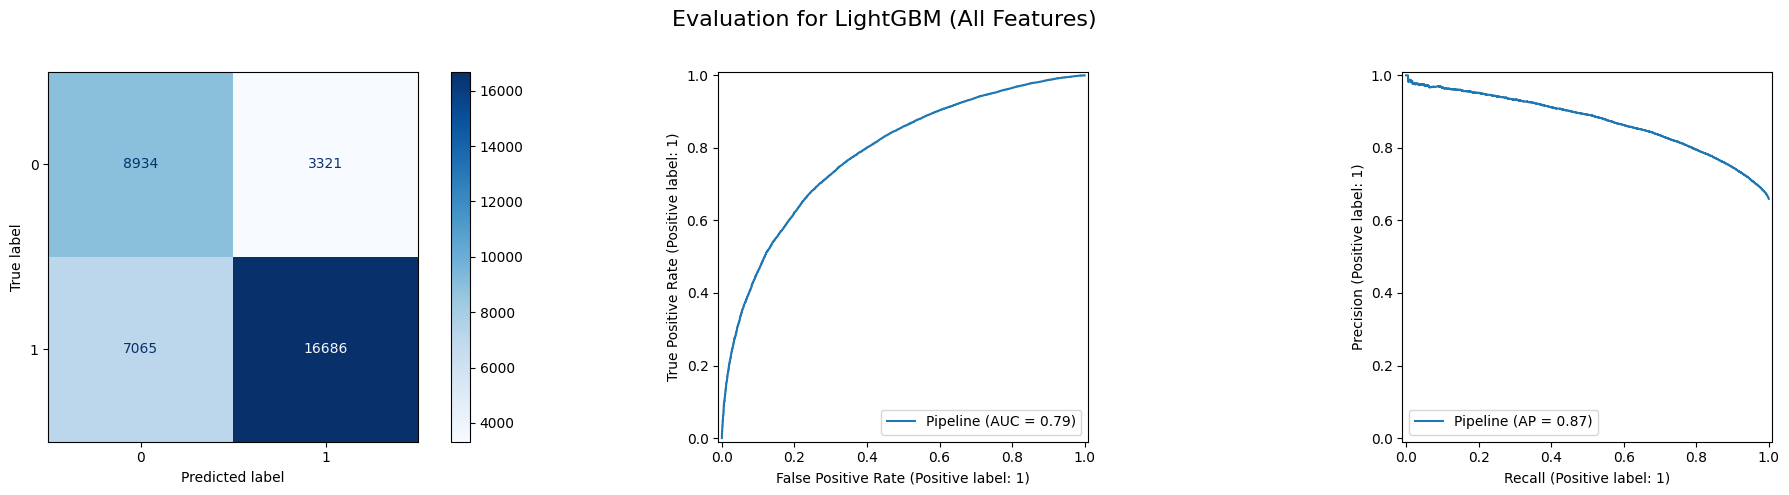


--- SHAP Analysis for LightGBM (All Features) ---


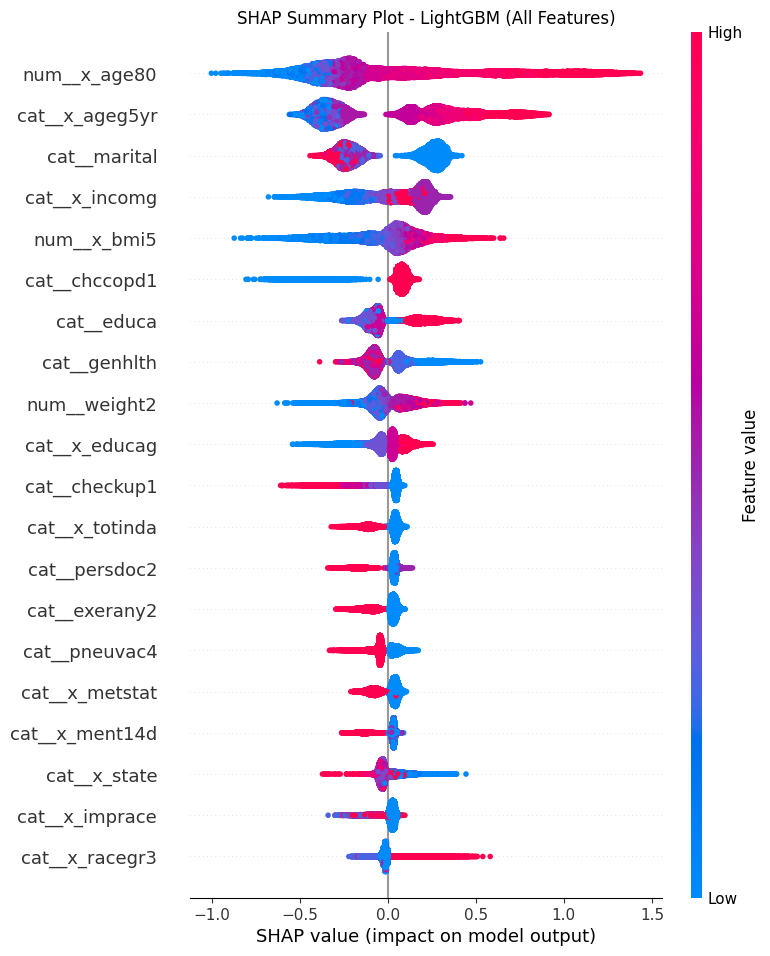


===== Training model: CatBoost (All Features) =====
Training completed in 76.58 seconds.
Accuracy: 0.7133 | F1-Score: 0.7194 | AUC: 0.7836


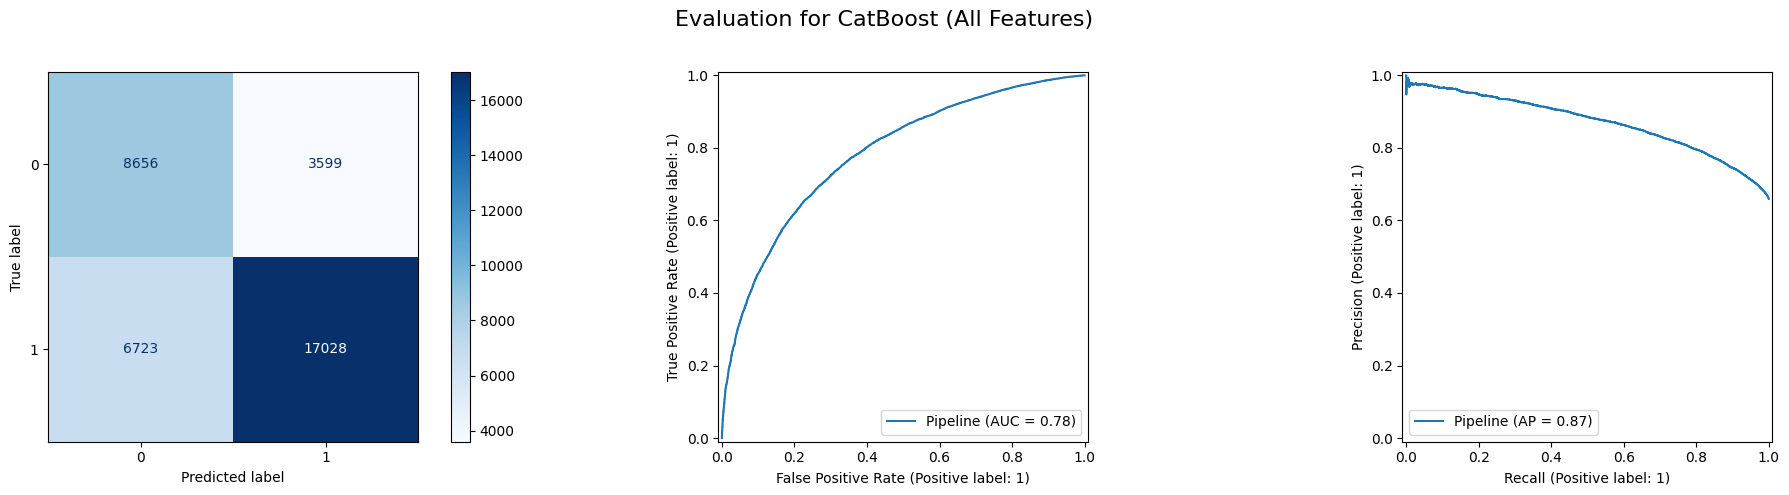


--- SHAP Analysis for CatBoost (All Features) ---


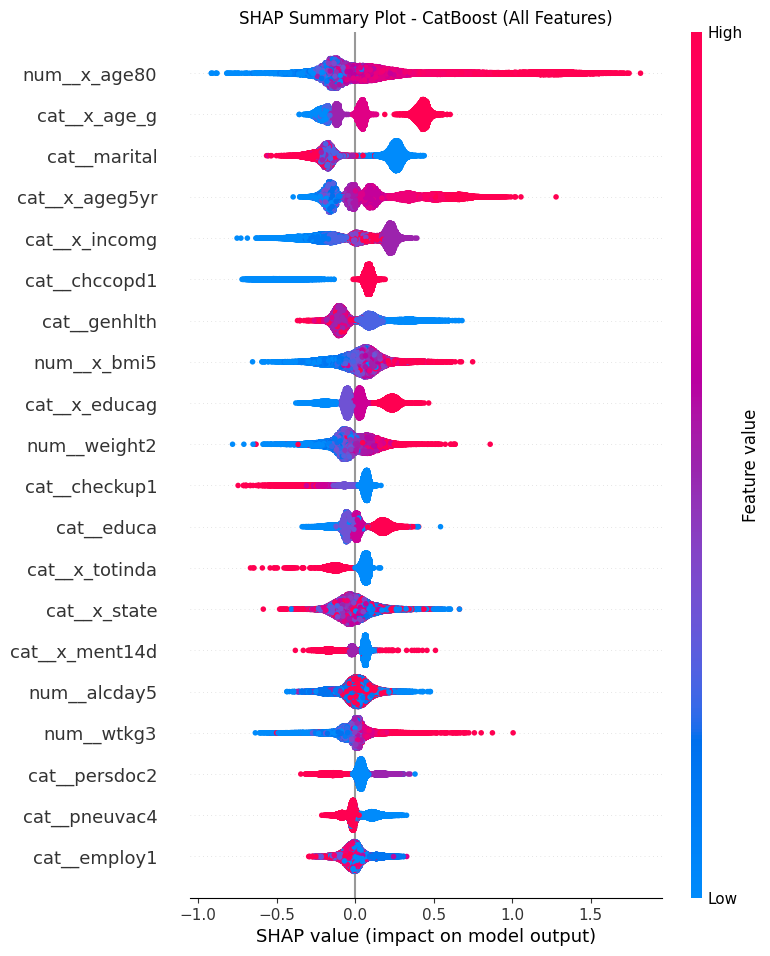


===== Training model: Logistic Regression (All Features) =====
Training completed in 35.26 seconds.
Accuracy: 0.7209 | F1-Score: 0.7020 | AUC: 0.7655


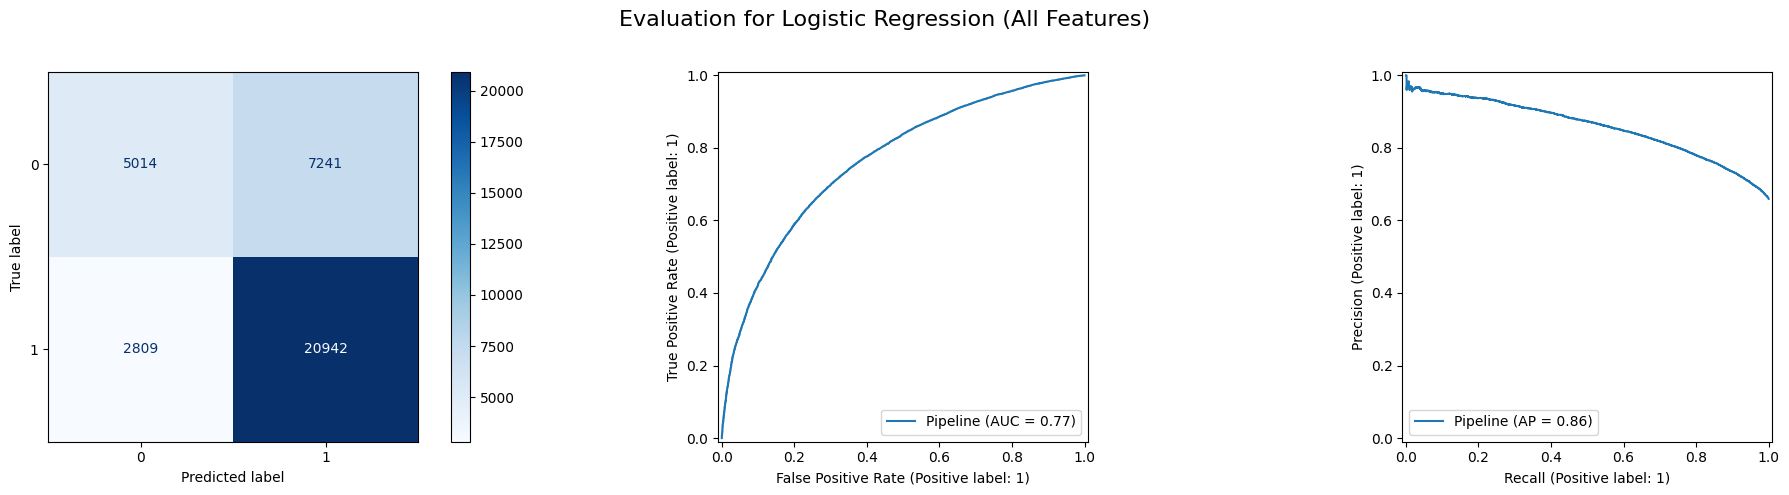


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.959730    2.610992
39   cat__chccopd1     0.561365    1.753063
42   cat__chckdny1    -0.452110    0.636284
13    cat__x_age_g    -0.446097    0.640122
41   cat__addepev2     0.268629    1.308169
36   cat__cvdcrhd4    -0.241728    0.785269
38    cat__asthma3    -0.225535    0.798089
45   cat__pneuvac4    -0.215237    0.806351
25   cat__x_educag     0.198640    1.219742
12    cat__genhlth    -0.198375    0.820063
18   cat__exerany2    -0.195365    0.822535
29  cat__x_metstat    -0.185244    0.830902
35   cat__cvdinfr4     0.135608    1.145233
11  cat__x_bmi5cat     0.124596    1.132690
27    cat__marital    -0.114844    0.891505
34   cat__checkup1    -0.113133    0.893032
44   cat__diffwalk     0.102927    1.108411
17  cat__x_totinda    -0.084162    0.919282
47  cat__x_ageg5yr     0.082597    1.086104
37   cat__cvdstrk3     0.082199    1.085672
33   cat__persdoc2    -0.081691    0.921556
46

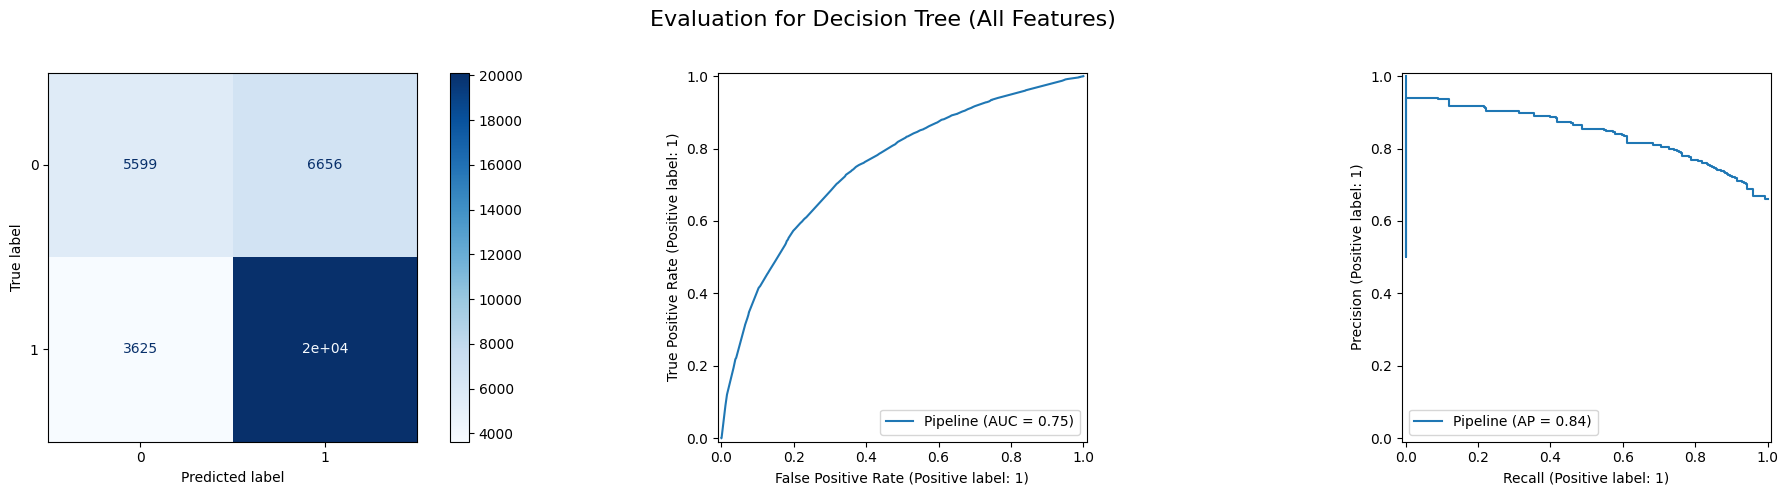


--- Decision Tree Analysis ---


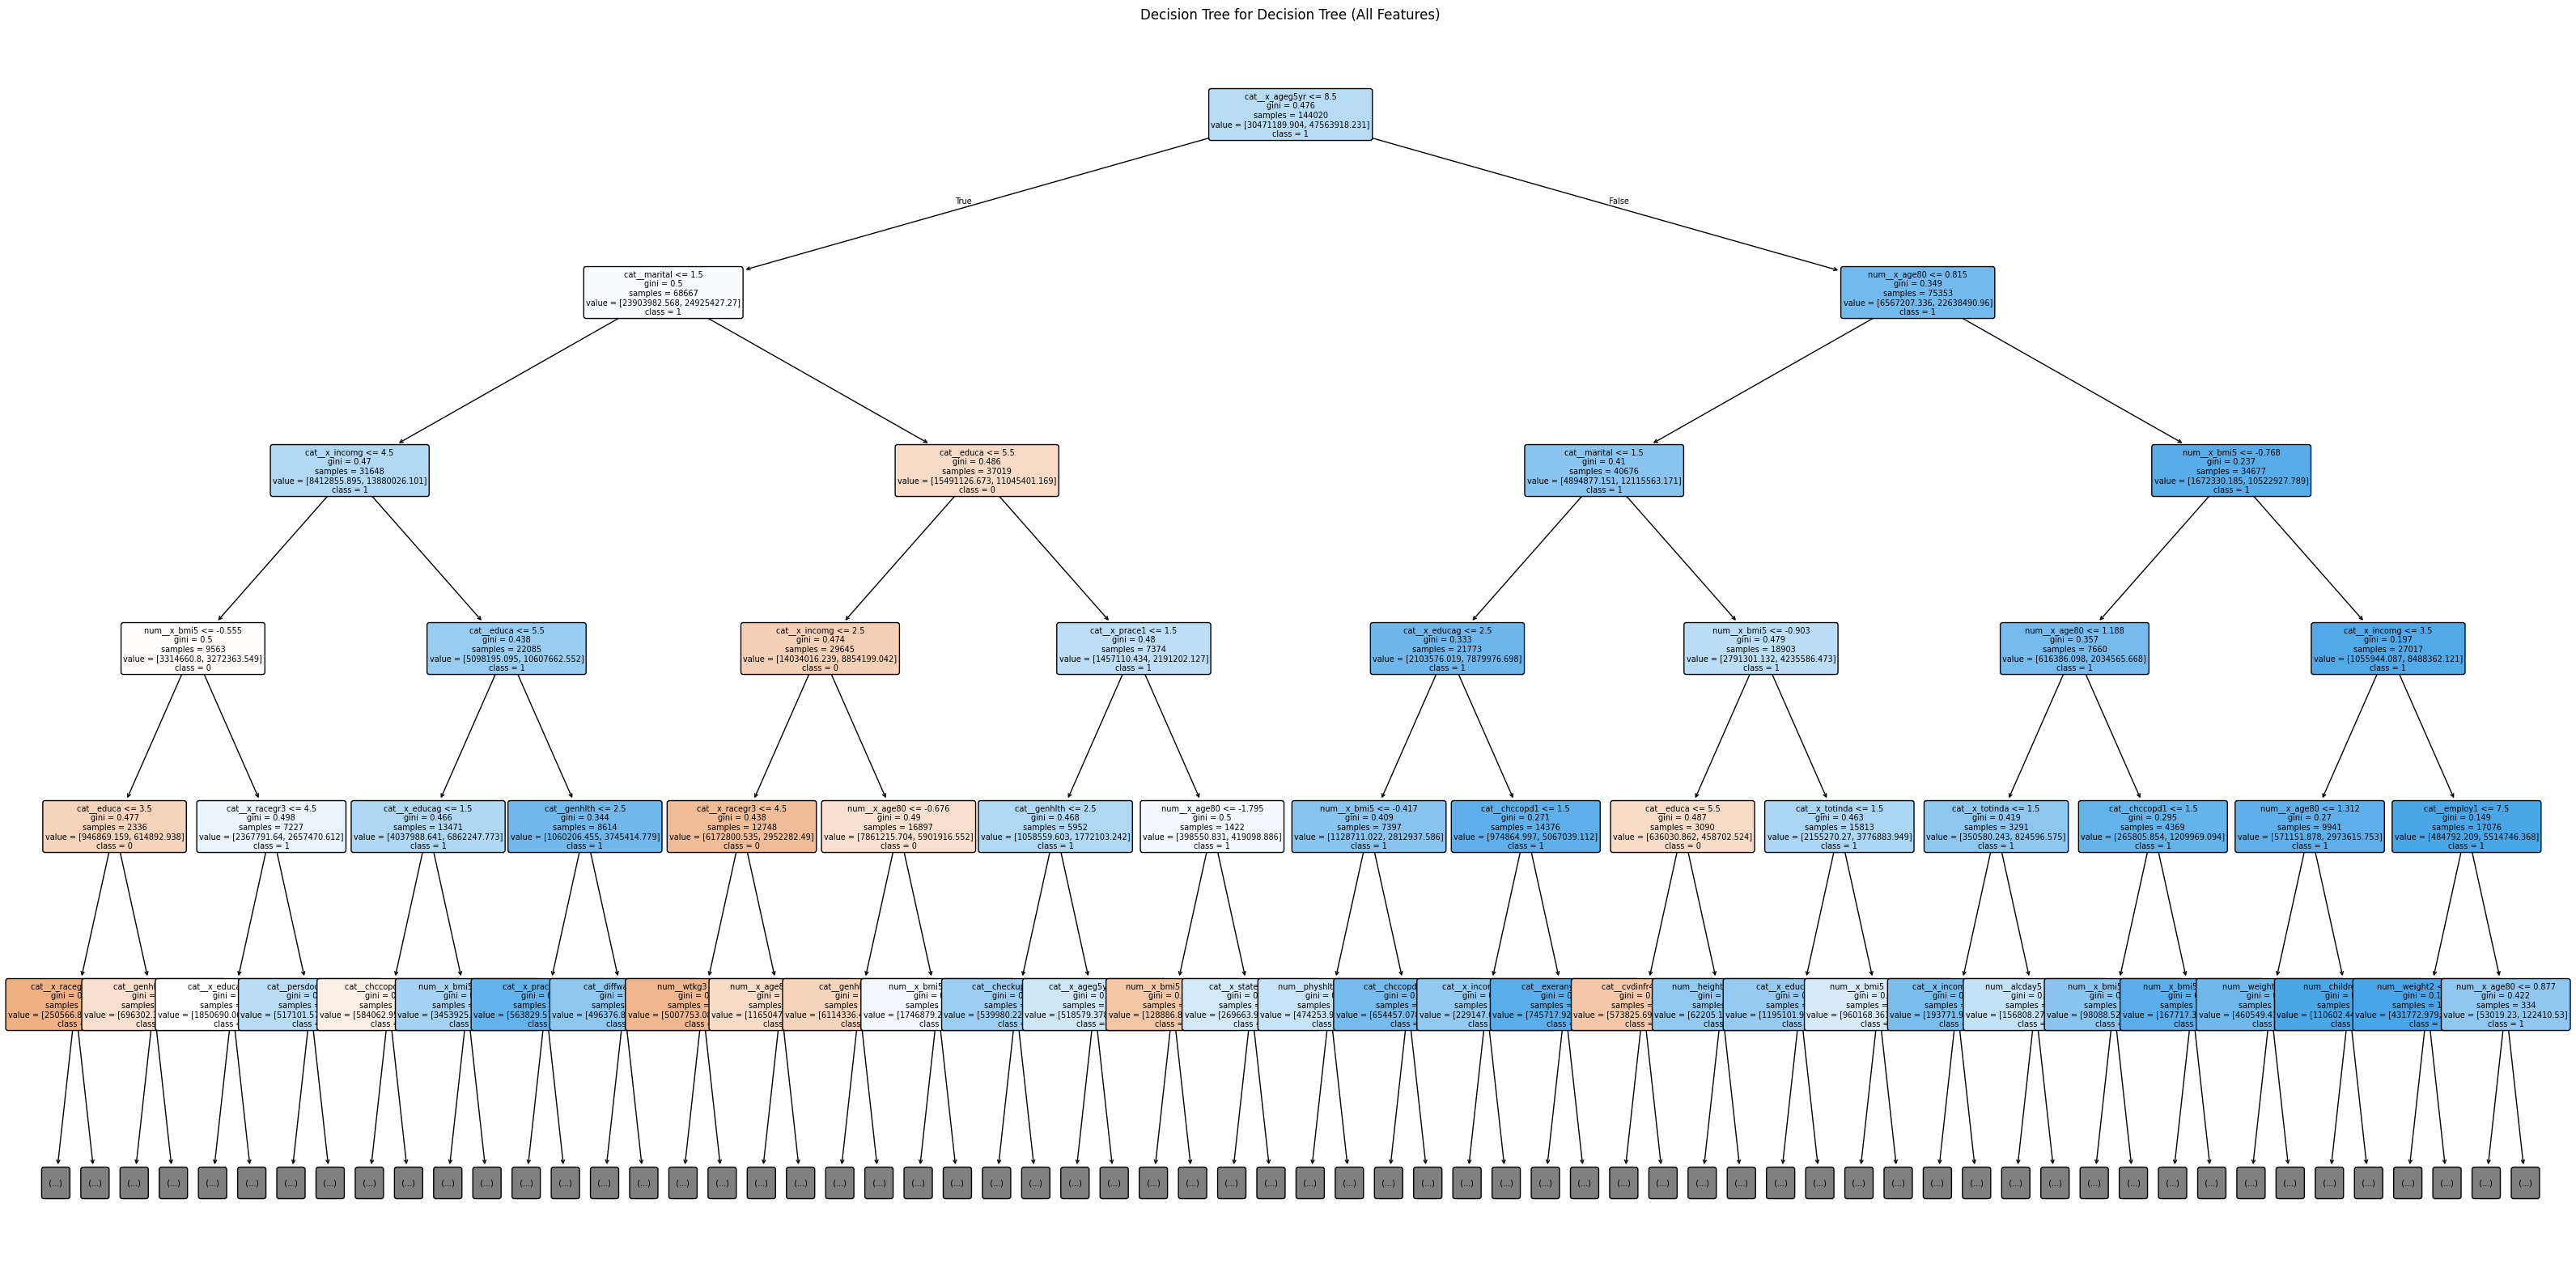

Tree Rules (first few levels):
 |--- cat__x_ageg5yr <= 8.50
|   |--- cat__marital <= 1.50
|   |   |--- cat__x_incomg <= 4.50
|   |   |   |--- num__x_bmi5 <= -0.55
|   |   |   |   |--- cat__educa <= 3.50
|   |   |   |   |   |--- cat__x_racegr3 <= 4.50
|   |   |   |   |   |   |--- num__weight2 <= -0.12
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- num__weight2 >  -0.12
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- cat__x_racegr3 >  4.50
|   |   |   |   |   |   |--- num__children <= -1.80
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__children >  -1.80
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- cat__educa >  3.50
|   |   |   |   |   |--- cat__genhlth <= 1.50
|   |   |   |   |   |   |--- num__height3 <= 0.14
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__height3 >  0.14

===== Training model: LDA (All Features) =====
Model is LDA, fitting without sample_weight.
Traini

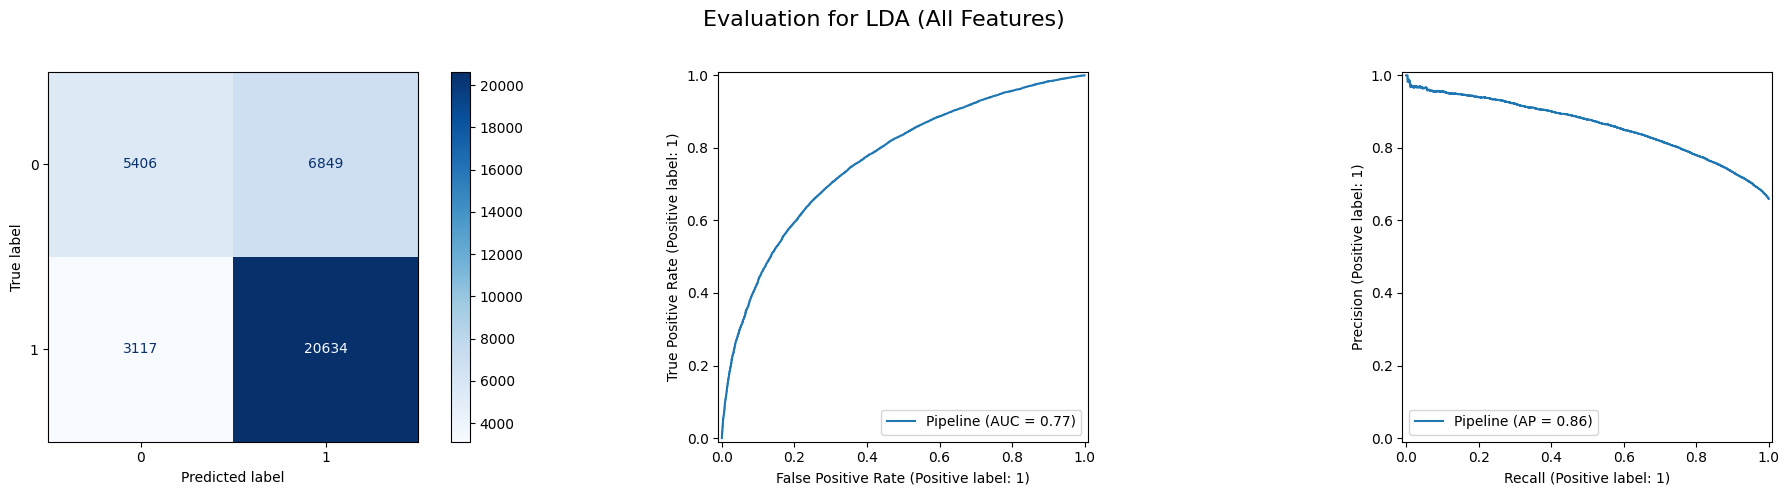


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     1.097699
39   cat__chccopd1     0.636788
13    cat__x_age_g    -0.433930
42   cat__chckdny1    -0.330622
18   cat__exerany2    -0.328614
38    cat__asthma3    -0.304255
41   cat__addepev2     0.259651
36   cat__cvdcrhd4    -0.243502
12    cat__genhlth    -0.194328
45   cat__pneuvac4    -0.180464
34   cat__checkup1    -0.156437
11  cat__x_bmi5cat     0.154242
26      cat__educa     0.145145
37   cat__cvdstrk3     0.136228
35   cat__cvdinfr4     0.131983
27    cat__marital    -0.130562
44   cat__diffwalk     0.118125
29  cat__x_metstat    -0.117220
25   cat__x_educag     0.116442
3       num__wtkg3     0.115971
33   cat__persdoc2    -0.096751
1      num__x_bmi5     0.092848
47  cat__x_ageg5yr     0.070020
14  cat__x_asthms1     0.068972
28   cat__x_incomg     0.063842
16  cat__x_casthm1    -0.061078
46   cat__x_rfhlth     0.058131
30  cat__x_urbstat    -0.055905
43   cat__diabete3    -0.050002
17  cat__x

In [35]:
# all features
print("\nAnalysis with All Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (All Features)", model_constructor, preprocessor, X, y, weights)
    all_features_results.append(result)


In [36]:
# Compare results
print("\nFinal Comparison Table")
vif_df = pd.DataFrame(vif_results)
all_df = pd.DataFrame(all_features_results)
final_results = pd.concat([vif_df, all_df]).set_index('Model')
print(final_results.sort_values(by='AUC', ascending=False))



Final Comparison Table
                                    Accuracy  F1-Score       AUC   Time (s)
Model                                                                      
LightGBM (All Features)             0.711548  0.718320  0.785781   5.471070
CatBoost (All Features)             0.713326  0.719439  0.783635  76.580049
XGBoost (All Features)              0.707632  0.713678  0.773639   6.074303
LightGBM (VIF)                      0.697995  0.705314  0.770479   3.552184
CatBoost (VIF)                      0.700355  0.707047  0.768437  65.273851
LDA (All Features)                  0.723213  0.708436  0.767798   1.875514
Logistic Regression (All Features)  0.720880  0.701983  0.765504  35.263551
XGBoost (VIF)                       0.692551  0.699228  0.756607   2.594562
Decision Tree (All Features)        0.714464  0.702881  0.752044   1.878301
Decision Tree (VIF)                 0.705605  0.690352  0.743037   1.413412
LDA (VIF)                           0.703494  0.681306  0.741413

### PCA

چه کاری انجام می‌دهد؟ PCA ویژگی‌های اولیه شما را به مجموعه‌ای جدید از ویژگی‌های ناهمبسته تبدیل می‌کند و همزمان می‌تواند ابعاد داده را کاهش دهد.

کِی باید استفاده کرد؟ زمانی که قصد دارید از مدل‌های حساس به هم‌خطی (مانند رگرسیون لجستیک) استفاده کنید و رفع هم‌خطی برای شما یک اولویت است.

ویژگی‌های جدید (مؤلفه‌های اصلی) دیگر به راحتی قابل تفسیر نیستند.

یک عیب PCA این است که مؤلفه‌های اصلی جدید، ترکیبی خطی از ویژگی‌های اولیه هستند و دیگر به راحتی قابل تفسیر نیستند. برای مثال، PC1 ممکن است چیزی شبیه به (0.4 * سن) - (0.6 * BMI) + (0.7 * درآمد) باشد. بنابراین، اگر هدف اصلی شما تفسیر ضرایب تک تک ویژگی‌های اولیه باشد، PCA بهترین انتخاب نیست.

In [ ]:
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_vif),
    ('pca', PCA(n_components=0.95)),  # n_components
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X_vif, y, weights, test_size=0.2, random_state=42, stratify=y
)

pca_pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)

num_components = pca_pipeline.named_steps['pca'].n_components_
print(f"n_components in PCA (95%): {num_components}")

y_pred_pca_lr = pca_pipeline.predict(X_test)

print("\nPCA + Logistic regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca_lr))



آموزش پایپ‌لاین PCA + Logistic Regression با وزن‌های نمونه...
آموزش کامل شد.

تعداد مؤلفه‌های اصلی انتخاب شده توسط PCA (برای حفظ ۹۵٪ واریانس): 4

--- نتایج مدل Logistic Regression پس از PCA ---
دقت (Accuracy): 0.6804

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.17      0.27     12255
           1       0.69      0.94      0.80     23751

    accuracy                           0.68     36006
   macro avg       0.65      0.56      0.53     36006
weighted avg       0.66      0.68      0.62     36006

